# Trabajo final integrador Análisis de datos
## Fernando Emir Garade

### 0. Importar librerías y cargar dataset

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv("data\weatherAUS.csv")

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [3]:
# Visualizar las primeras filas
data.head(5)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
# Realizar un resumen de 5 números
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

- MinTemp: La media está muy cerca de la mediana, por lo que a priori podemos pensar en una distribución centrada alrededor de la media. Con esta información no se destacan valores extremos importantes.
- MaxTemp: La media está muy cerca de la mediana, por lo que a priori podemos pensar en una distribución centrada alrededor de la media. Con esta información no se destacan valores extremos importantes.
- Rainfall: Por los valores de las medidas de tendencia central podemos apreciar una variable con distribución sesgada a la derecha. Luego, deberíamos verificar la mejor manera de tratar los valores muy grandes como el máximo de 371.
- Evaporation: Por los valores de las medidas de tendencia central podemos apreciar una variable con distribución sesgada a la derecha. Luego, deberíamos verificar la mejor manera de tratar los valores muy grandes como el máximo de 145. Tiene muchos valores nulos.
- Sunshine: La media es un poco menor que la mediana aunque no demasiado. Tiene muchos valores nulos.

In [5]:
# Identificar los tipos de datos: categórico, ordinal, etc. 
# Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())

Date
2013-08-19    49
2015-08-15    49
2013-06-13    49
2016-10-01    49
2014-02-28    49
              ..
2007-11-17     1
2007-12-19     1
2007-11-25     1
2008-01-26     1
2007-12-13     1
Name: Date, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Melbourne           3193
Darwin              3193
Brisbane            3193
Hobart              3193
Perth               3193
Adelaide            3193
Wollongong          3040
Albany              3040
Bendigo             3040
Cairns              3040
Townsville          3040
Ballarat            3040
Albury              3040
MountGambier        3040
Launceston          3040
MountGinini         3040
AliceSprings        3040
GoldCoast           3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Williamtown         3009
Sale                3009
Richmond            3009
NorfolkIsland       3009
Woomera             3009
Dartmoor            3009
PearceRAAF          3009
Nuriootpa 

In [7]:
# Convertimos la variable fecha en formato datetime
data['Date'] = pd.to_datetime(data['Date'])

A priori vamos a considerar que todas las variables pueden aportarnos algo de información útil a nuestro problema de clasificación. Hay muchas variables que pueden estar correlacionadas entre sí, lo que podría generarnos problemas después al entrenar el algoritmo, pero por ahora no las descartaremos. Tampoco encontramos alguna variable con un solo valor único, la cual podríamos inferir que no aporta información extra. 

Las variables con las que vamos a trabajar son:
 
 0. Date: Variable de tipo fecha
 1. Location: Variable de tipo categórica nominal 
 2. MinTemp: Variable de tipo numérica.
 3. MaxTemp: Variable de tipo numérica.
 4. Rainfall: Variable de tipo numérica.
 5. Evaporation: Variable de tipo numérica.
 6. Sunshine: Variable de tipo numérica.
 7. WindGustDir: Variable de tipo categórica nominal 
 8. WindGustSpeed: Variable de tipo numérica.
 9. WindDir9am: Variable de tipo categórica nominal
 10. WindDir3pm: Variable de tipo categórica nominal
 11. WindSpeed9am: Variable de tipo numérica.
 12. WindSpeed3pm: Variable de tipo numérica.
 13. Humidity9am: Variable de tipo numérica.
 14. Humidity3pm: Variable de tipo numérica.
 15. Pressure9am: Variable de tipo numérica.
 16. Pressure3pm: Variable de tipo numérica.
 17. Cloud9am: Variable de tipo numérica.
 18. Cloud3pm: Variable de tipo numérica.
 19. Temp9am: Variable de tipo numérica.
 20. Temp3pm: Variable de tipo numérica.
 21. RainToday: Variable de tipo categórica nominal
 22. RainTomorrow: Variable de tipo categórica nominal

- Identificar las variables de entrada y de salida del problema.

In [8]:
print('Las variables de entrada son: ',list(data.drop('RainTomorrow',axis=1).columns))

Las variables de entrada son:  ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [9]:
print('La variable de salida es: RainTomorrow')

La variable de salida es: RainTomorrow


- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?

##### Variables numéricas

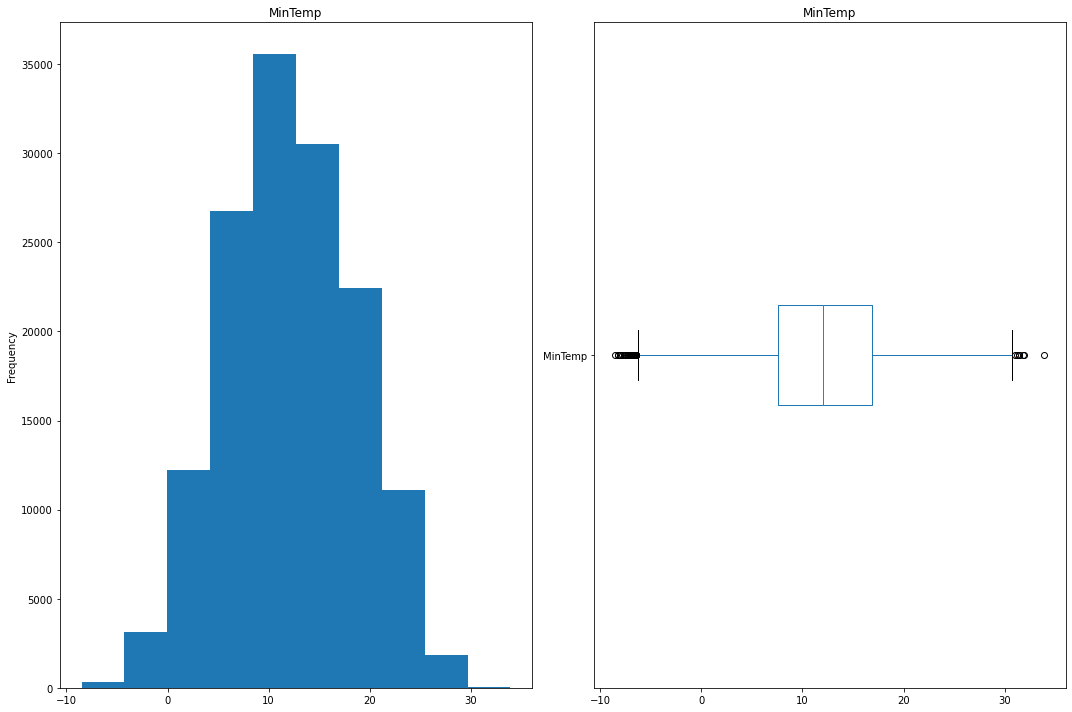

Asimetría:  0.021188284011150468
Kurtosis:  -0.48397211700038856


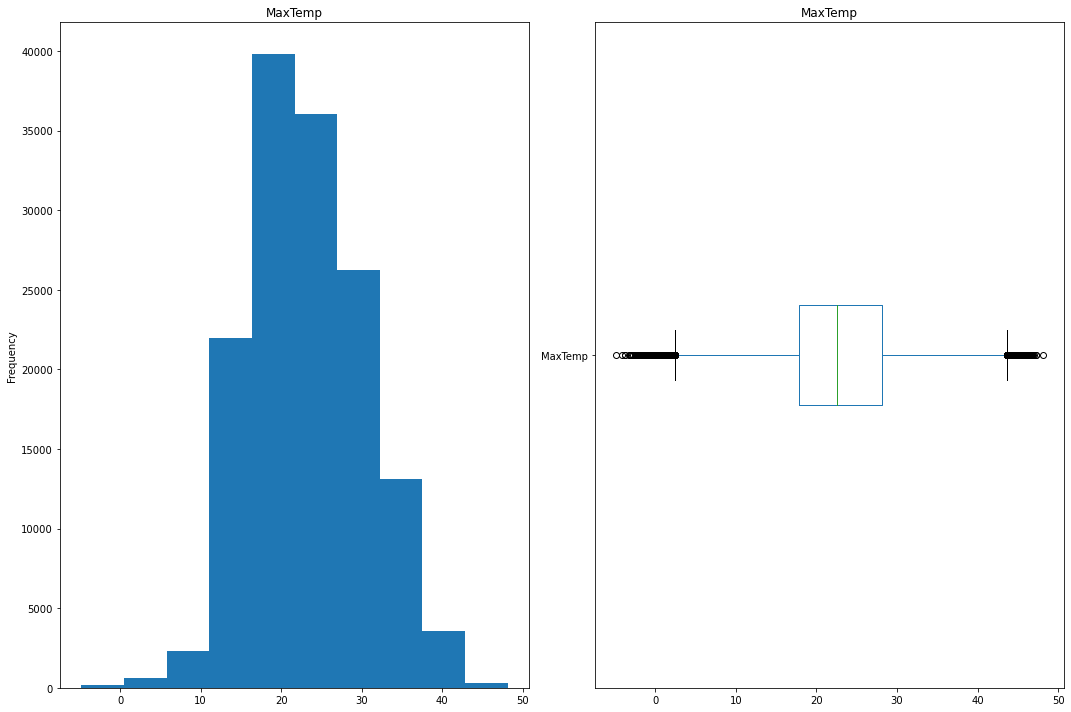

Asimetría:  0.22083934813407782
Kurtosis:  -0.2246297847729699


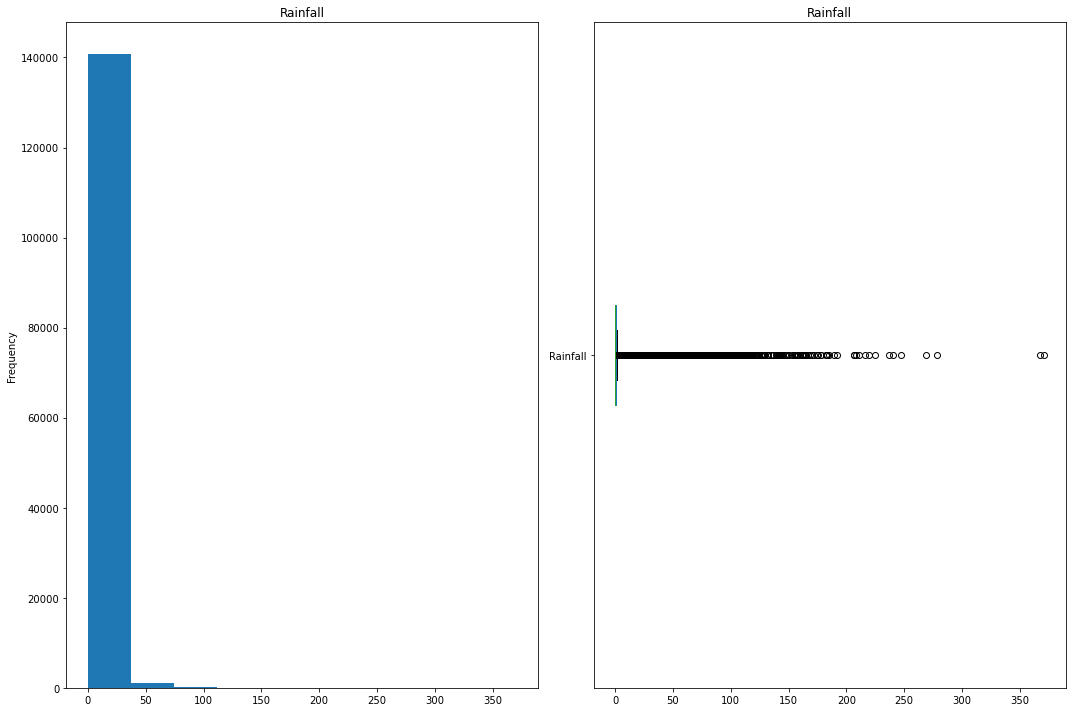

Asimetría:  9.83622525039533
Kurtosis:  178.15207877160074


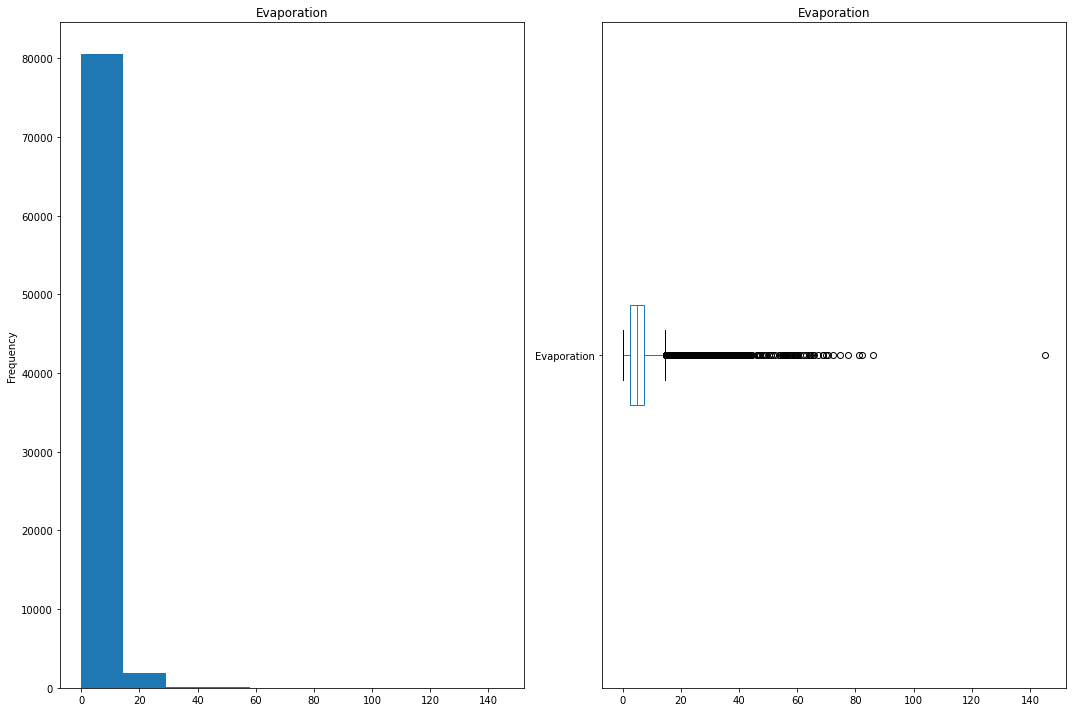

Asimetría:  3.7612860111420643
Kurtosis:  45.04326649821111


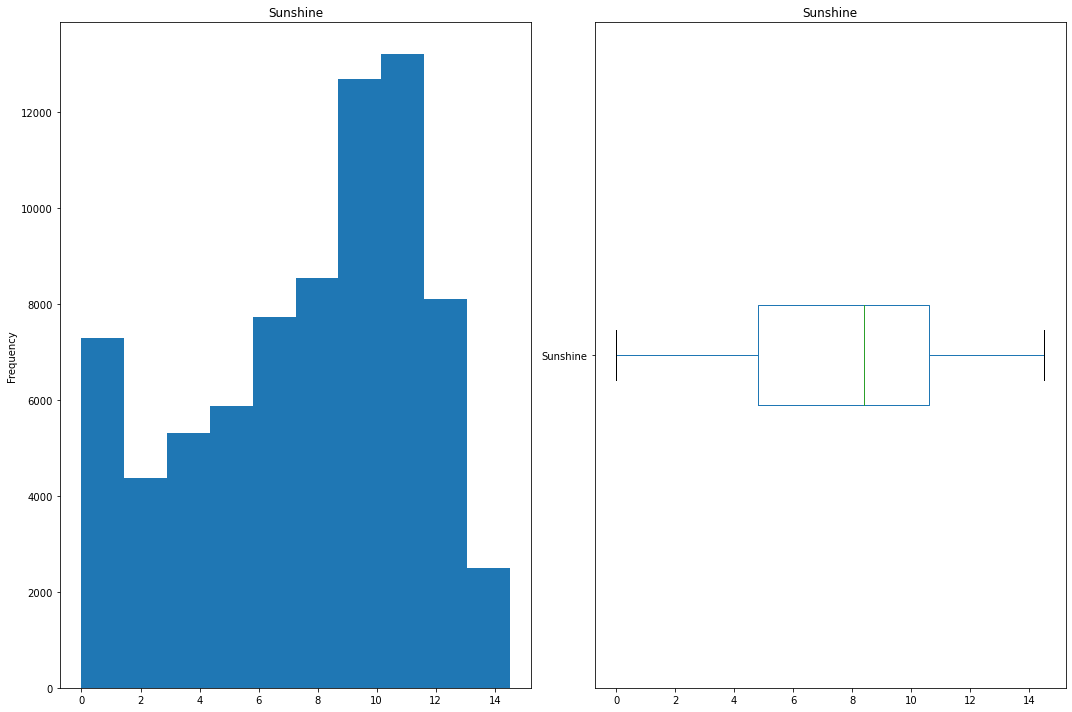

Asimetría:  -0.4964800381328167
Kurtosis:  -0.8294593401754096


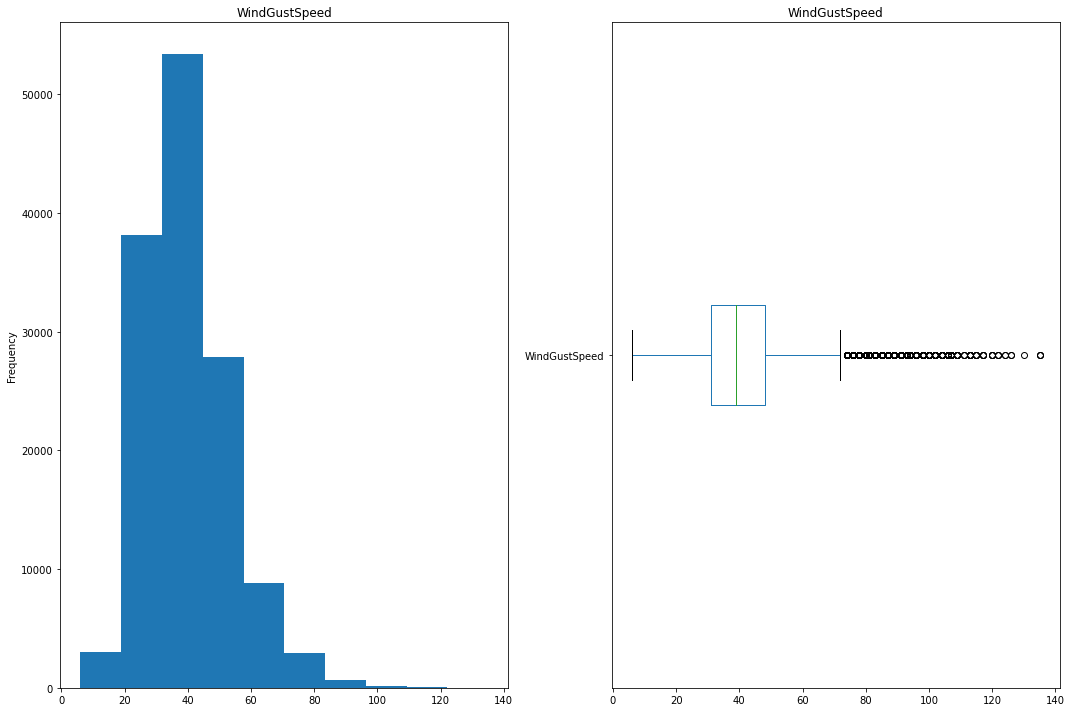

Asimetría:  0.8748788780303394
Kurtosis:  1.4186423199602185


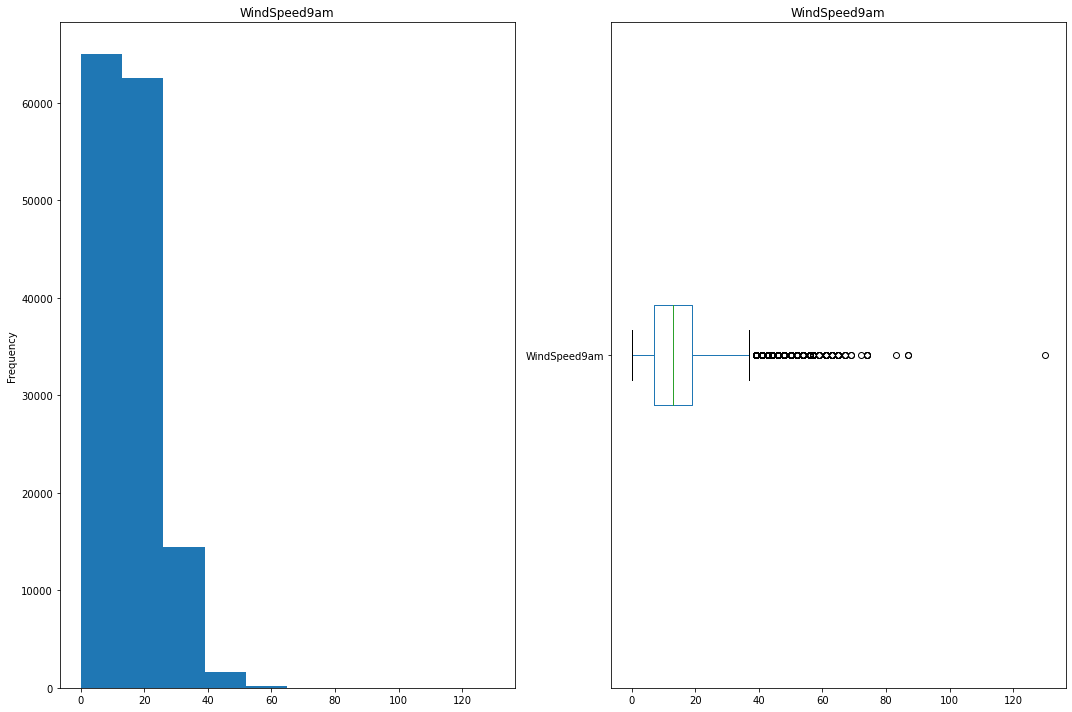

Asimetría:  0.7776295122810298
Kurtosis:  1.226990906565216


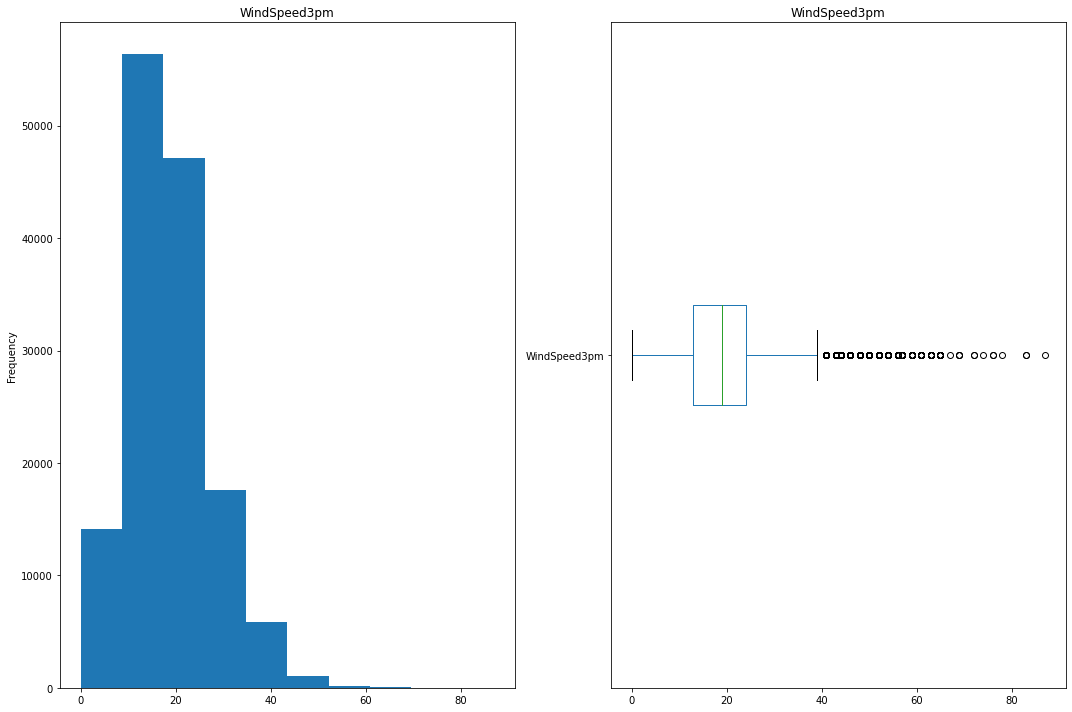

Asimetría:  0.6282154194116664
Kurtosis:  0.763858238447257


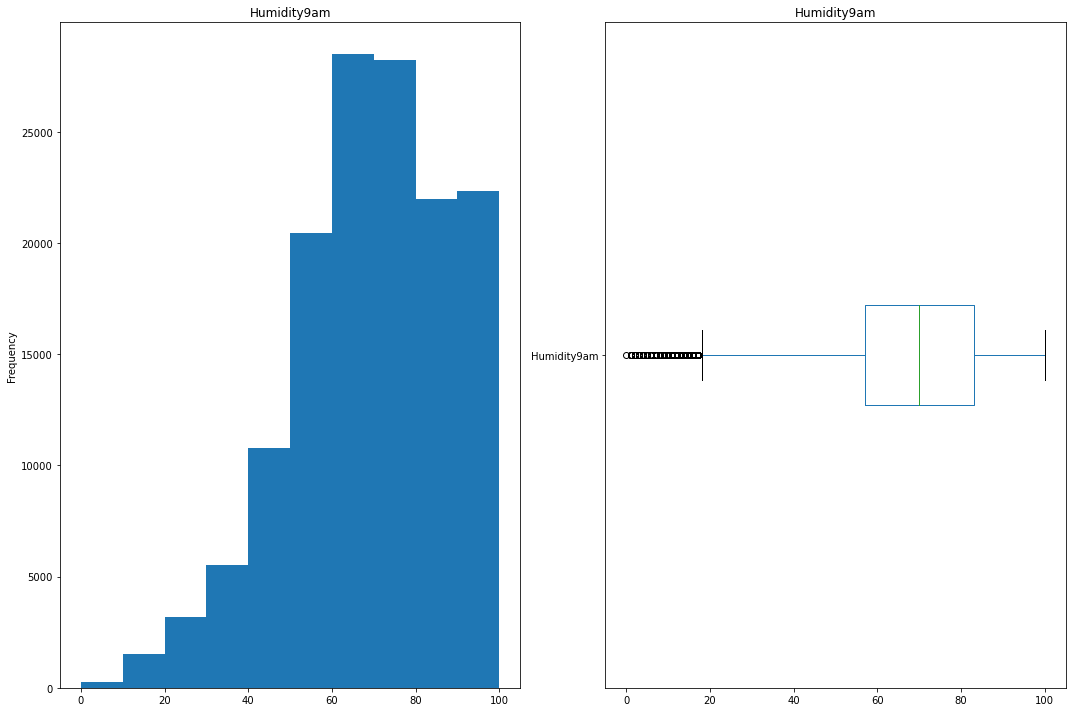

Asimetría:  -0.48396899459793047
Kurtosis:  -0.037555041817225465


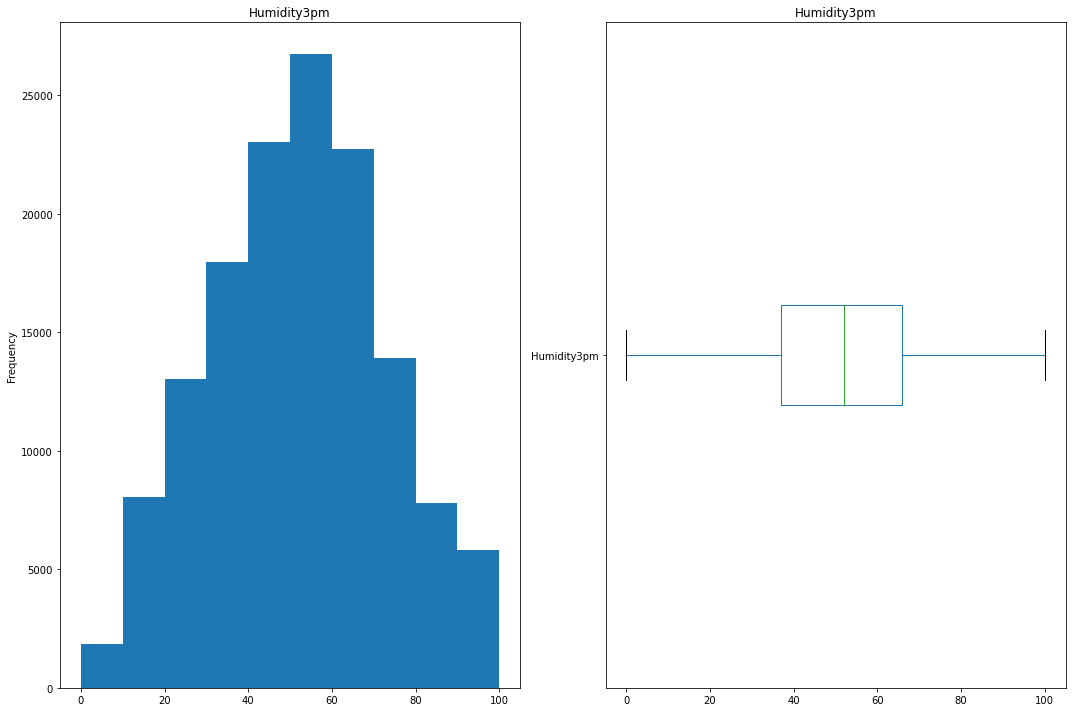

Asimetría:  0.03361436764166918
Kurtosis:  -0.5113632483867216


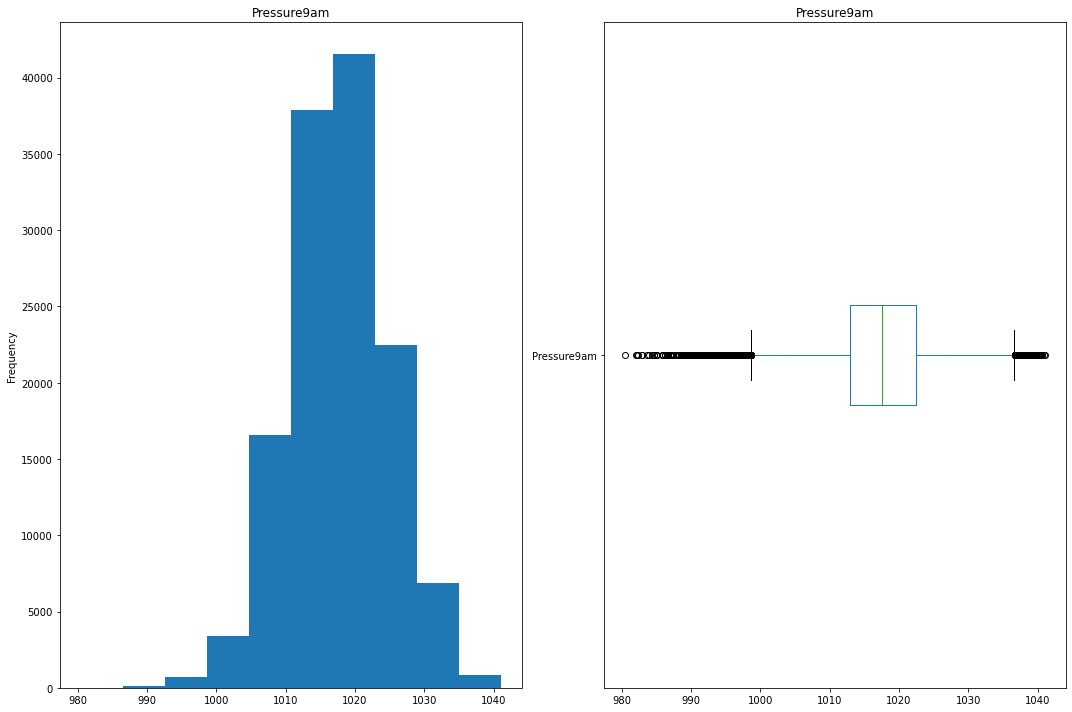

Asimetría:  -0.09552363669451734
Kurtosis:  0.23156262156393037


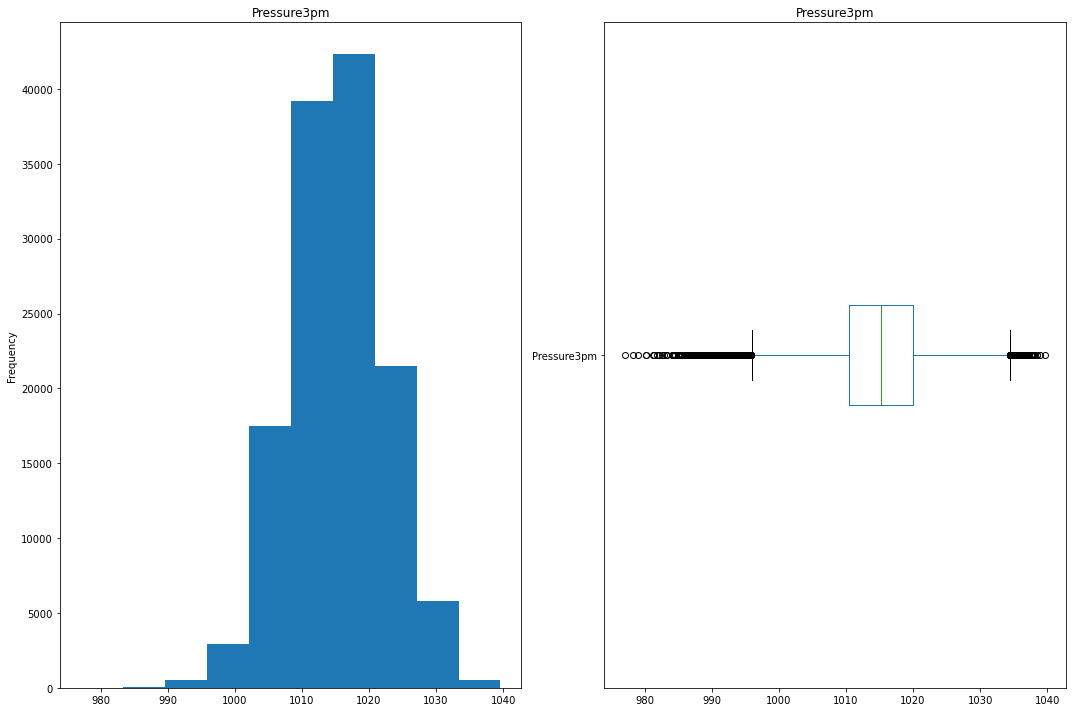

Asimetría:  -0.04562140480119886
Kurtosis:  0.1291715571926182


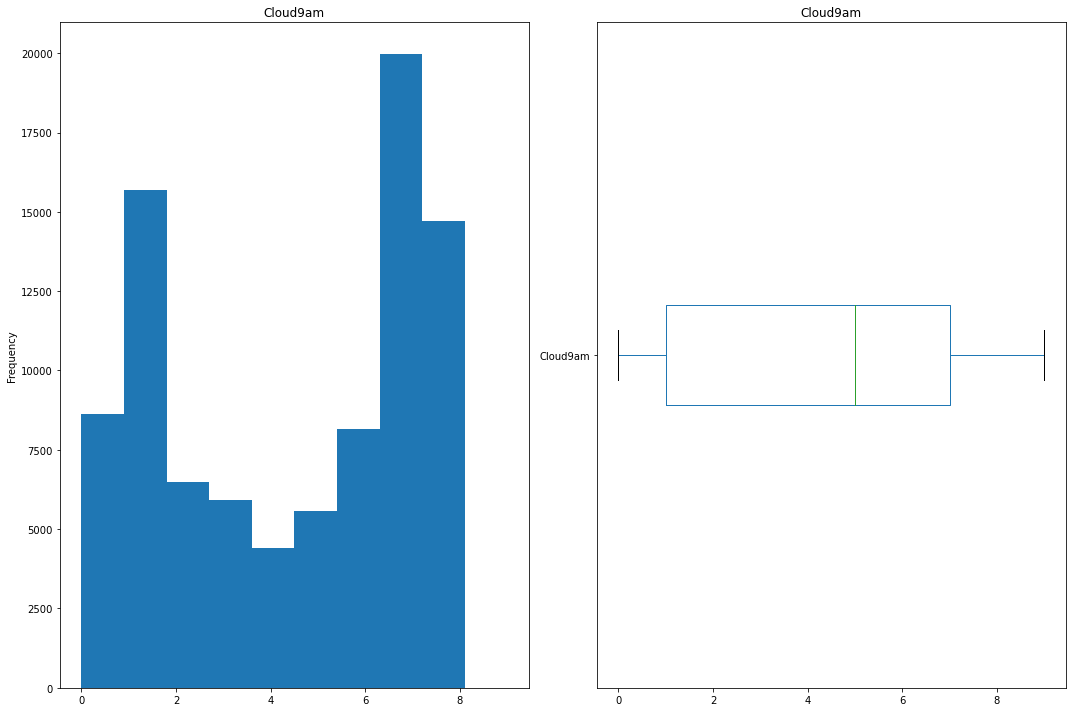

Asimetría:  -0.229081832248417
Kurtosis:  -1.5388304886855662


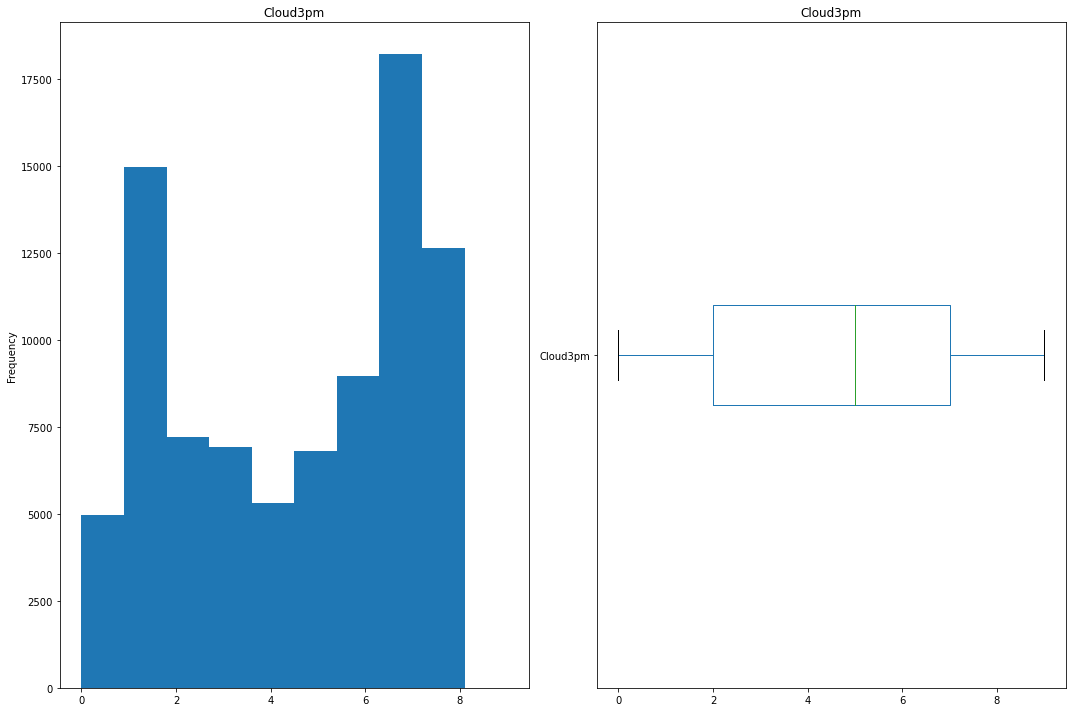

Asimetría:  -0.22638434607149094
Kurtosis:  -1.45652451574581


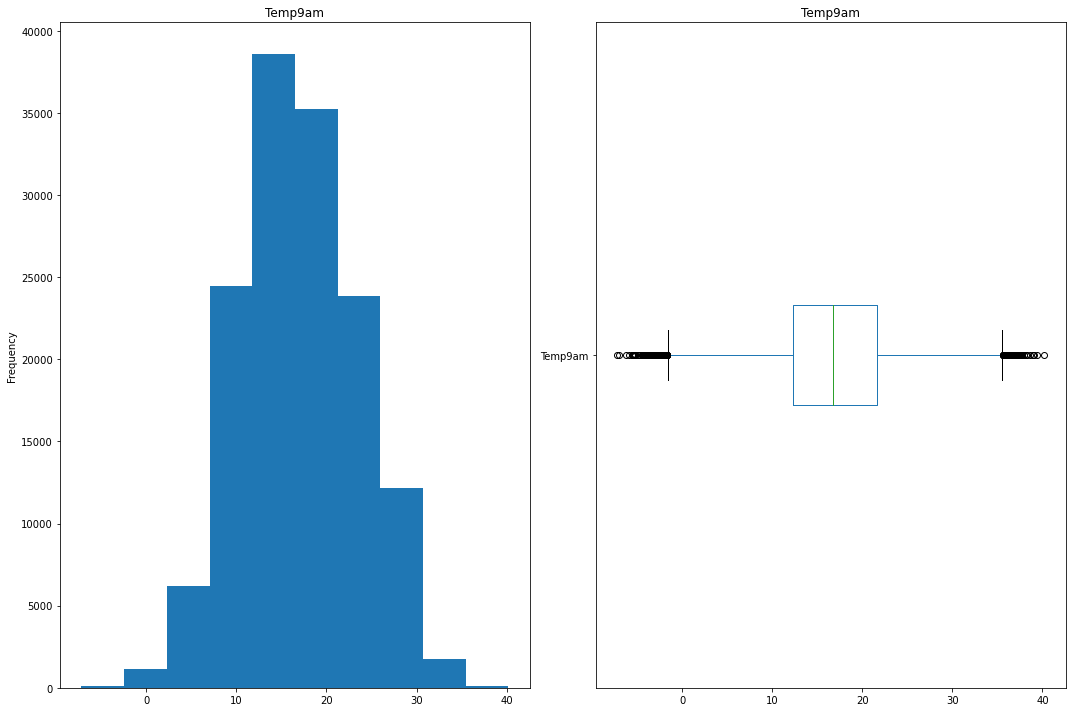

Asimetría:  0.08853999659506906
Kurtosis:  -0.3405233369037113


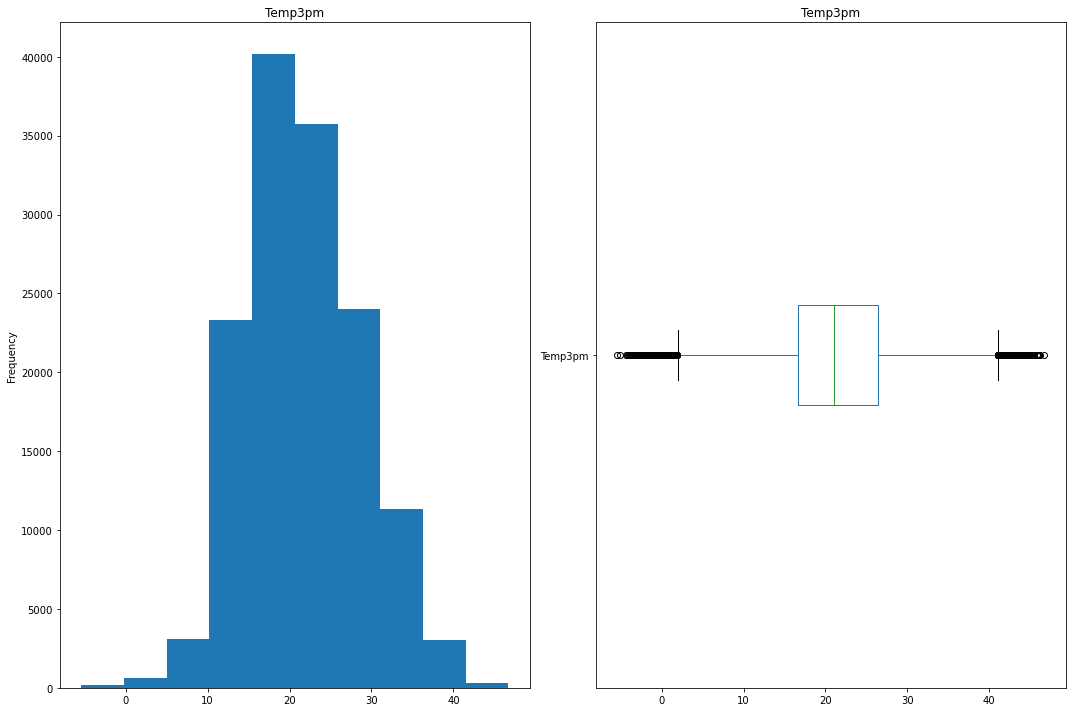

Asimetría:  0.2379603639909972
Kurtosis:  -0.13628147046086658


In [10]:
num_var=data.select_dtypes(exclude=['object','datetime64[ns]'])
for i in range(len(num_var.columns)):
    var_name=num_var.columns[i]
    plt.subplots(figsize=(15,10))
    plt.subplot(1,2,1)
    plt.title(var_name)
    num_var[var_name].plot(kind='hist')
    plt.subplot(1,2,2)
    plt.title(var_name)
    num_var[var_name].plot(kind='box',vert=False)
    plt.tight_layout()
    plt.show()
    print('Asimetría: ',num_var[var_name].skew())
    print('Kurtosis: ',num_var[var_name].kurt())

- MinTemp: La distribución de la variable está centrada en la media, tiene muy poca asimetría y el coeficiente de kurtosis es muy similar al de una normal (pandas usa la definición de Fisher para darle a la distribución normal una kurtosis de 0).
- MaxTemp: La distribución de la variable está centrada en la media, tiene muy poca asimetría y el coeficiente de kurtosis es muy similar al de una normal (pandas usa la definición de Fisher para darle a la distribución normal una kurtosis de 0).
- Rainfall: La distribución está muy sesgada hacia la derecha y el grado de apuntamiento (kurtosis) es muy elevado. Los valores extremos muy grandes pueden estar distorsionando la muestra.
- Evaporation: La distribución está muy sesgada hacia la derecha y el grado de apuntamiento (kurtosis) es elevado. Los valores extremos muy grandes pueden estar distorsionando la muestra.
- Sunshine: La distribución posee algo de asimetría negativa (izquierda) y es un poco más plana que una normal. También podemos decir que no hay grandes valores extremos. 
- WindGustSpeed: La variable tiene una distribución centrada alrededor de la media con un poco de asimetría positiva (derecha) y un apuntamiento un poco mayor que el de una normal. 
- WindSpeed9am: La distribución está sesgada positivamente (derecha) y tiene un grado de apuntamiento levemente mayor que el de la normal.
- WindSpeed3pm: La variable se parece a una normal en oblicuidad y apuntamiento. Pueden haber algunos valores extremos en la muestra.
- Humidity9am: La distribución de la variable se parece a una normal pero tiene un sesgo negativo (izquierda).
- Humidity3pm: La distribución se parece bastante a una normal pero un poco más plana.
- Pressure9am: La distribución se parece bastante a una normal pero un poco más plana.
- Pressure3pm: La distribución se parece bastante a una normal pero un poco más plana.
- Cloud 9am: La distribución tiene 2 picos, similares a una distribución bimodal. En este caso hay una sola moda, pero existe otro valor con mucha frecuencia también.
- Cloud 3pm: La distribución tiene 2 picos, similares a una distribución bimodal. En este caso hay una sola moda, pero existe otro valor con mucha frecuencia también.
- Temp 9am: La distribución se parece bastante a una normal pero un poco más plana.
- Temp 3pm: La distribución se parece bastante a una normal pero un poco más plana.

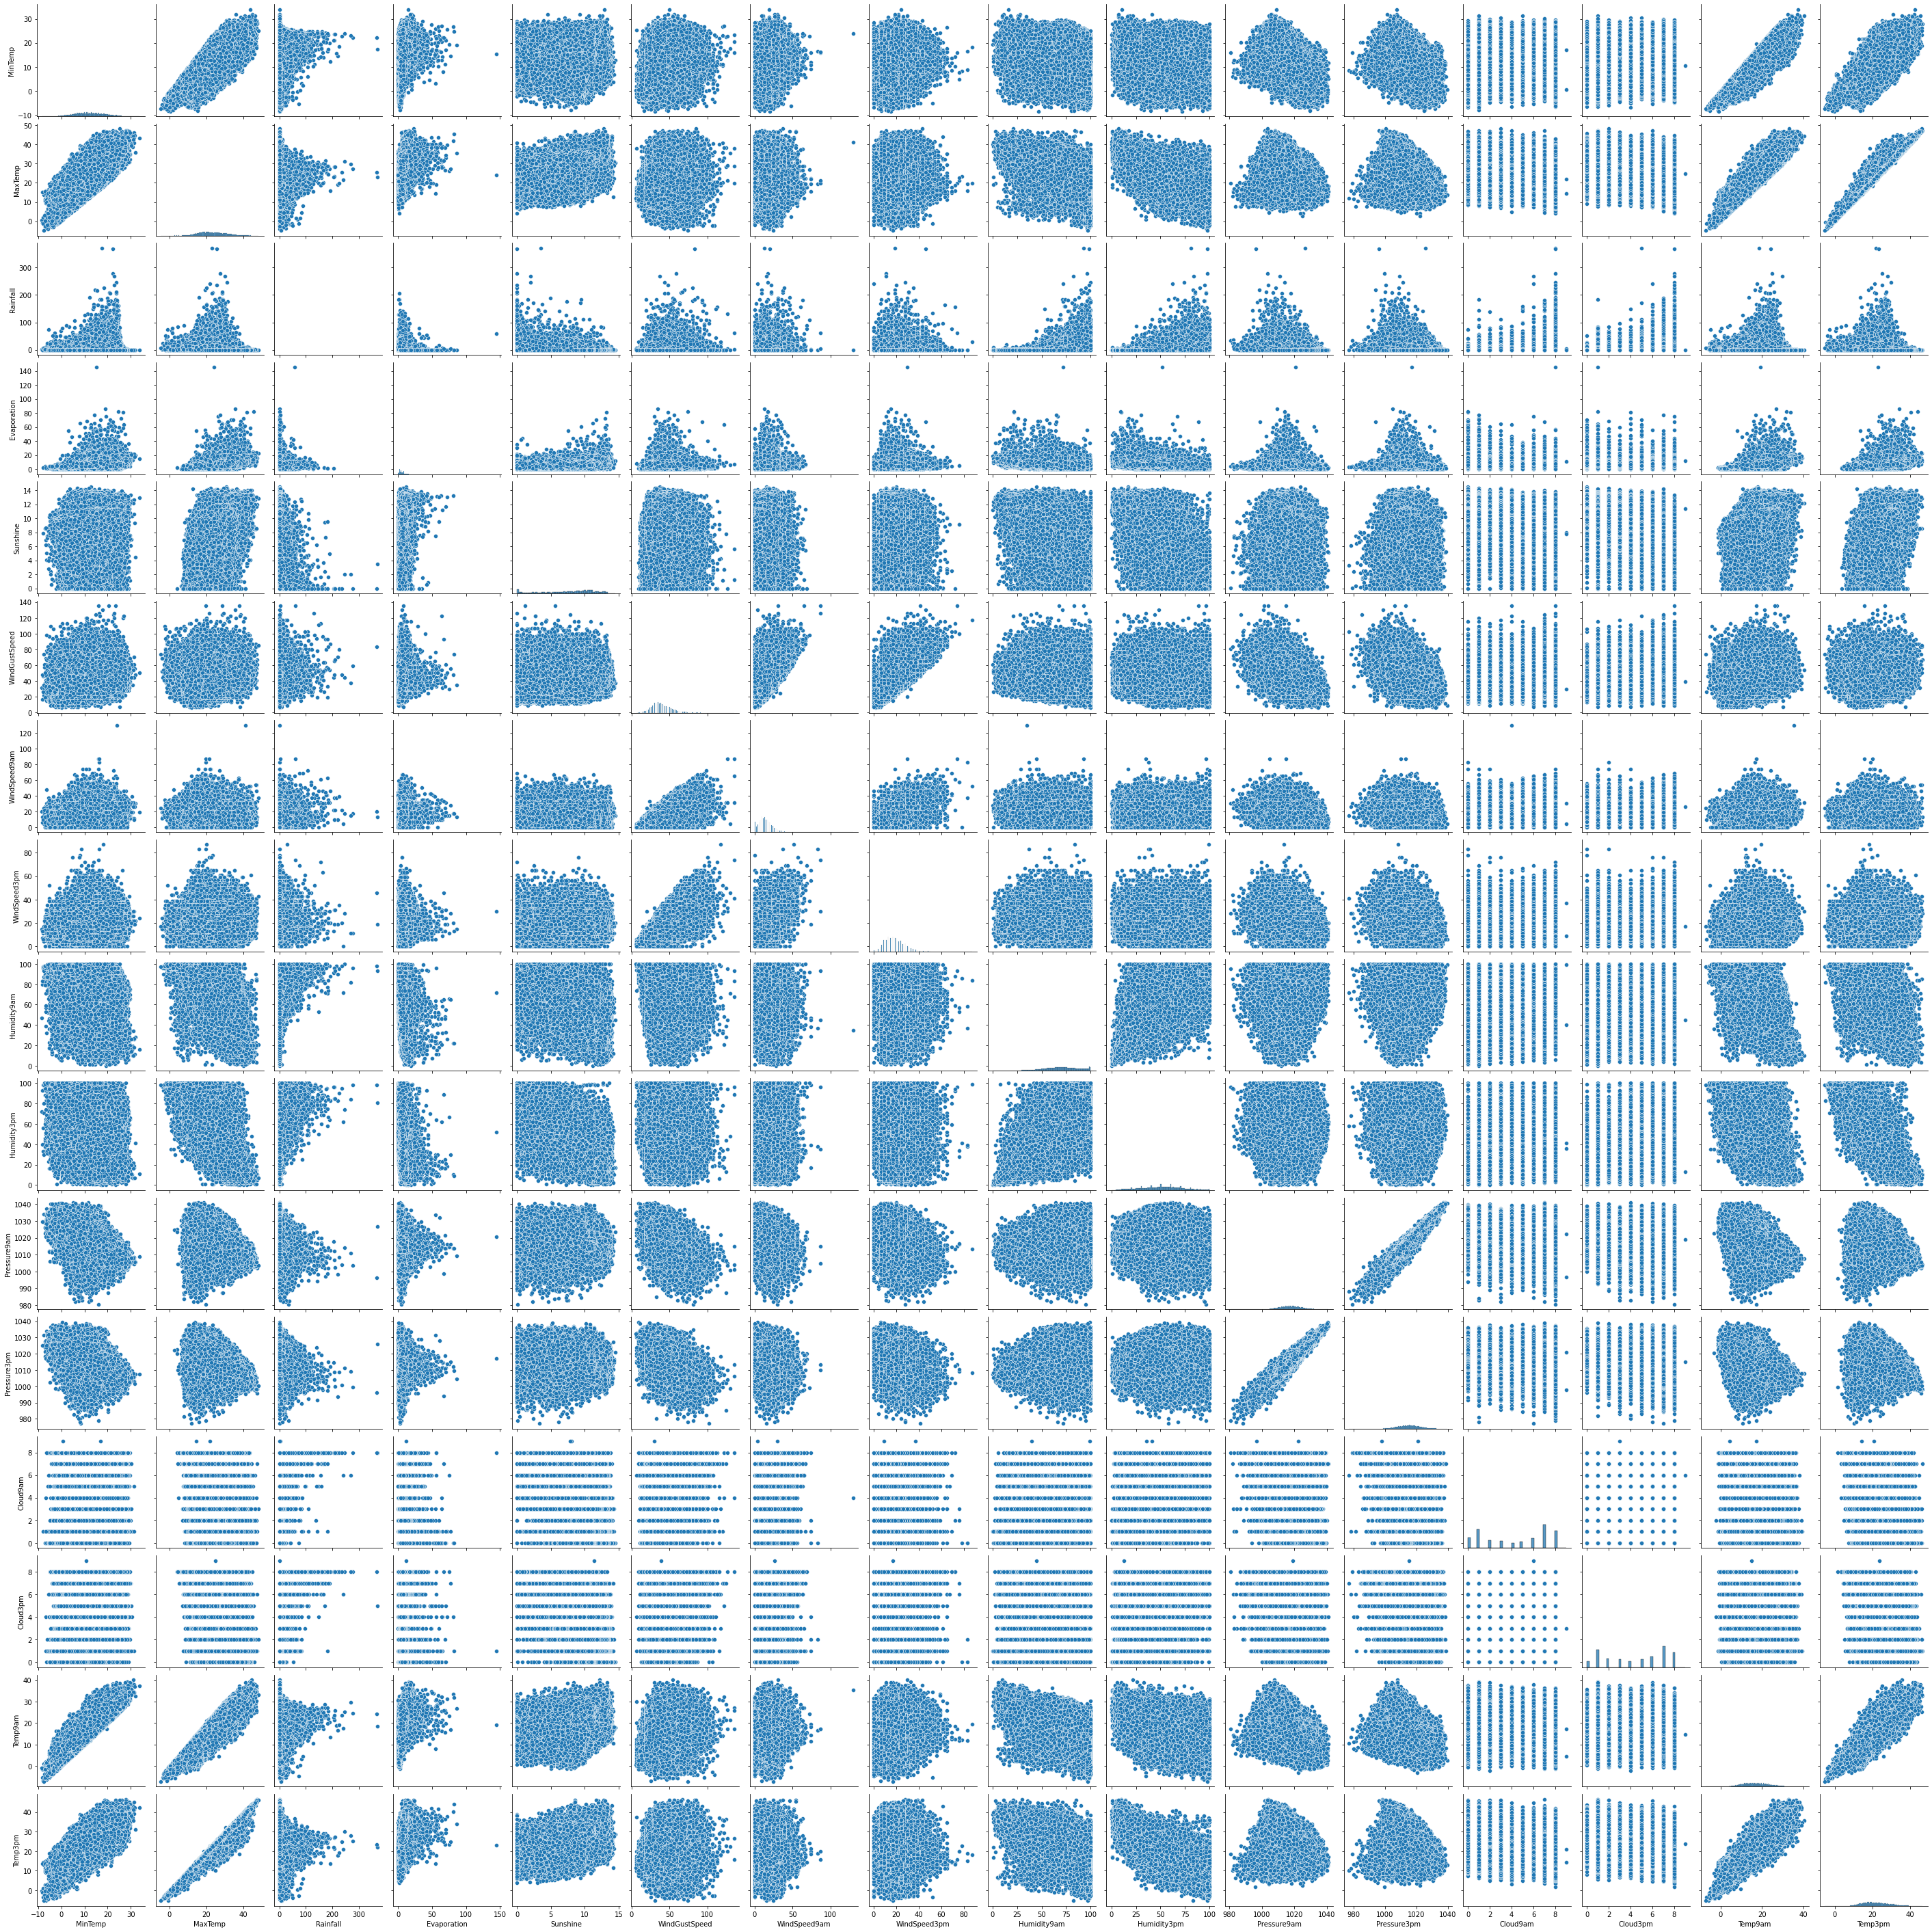

In [11]:
sns.pairplot(data)

<AxesSubplot:>

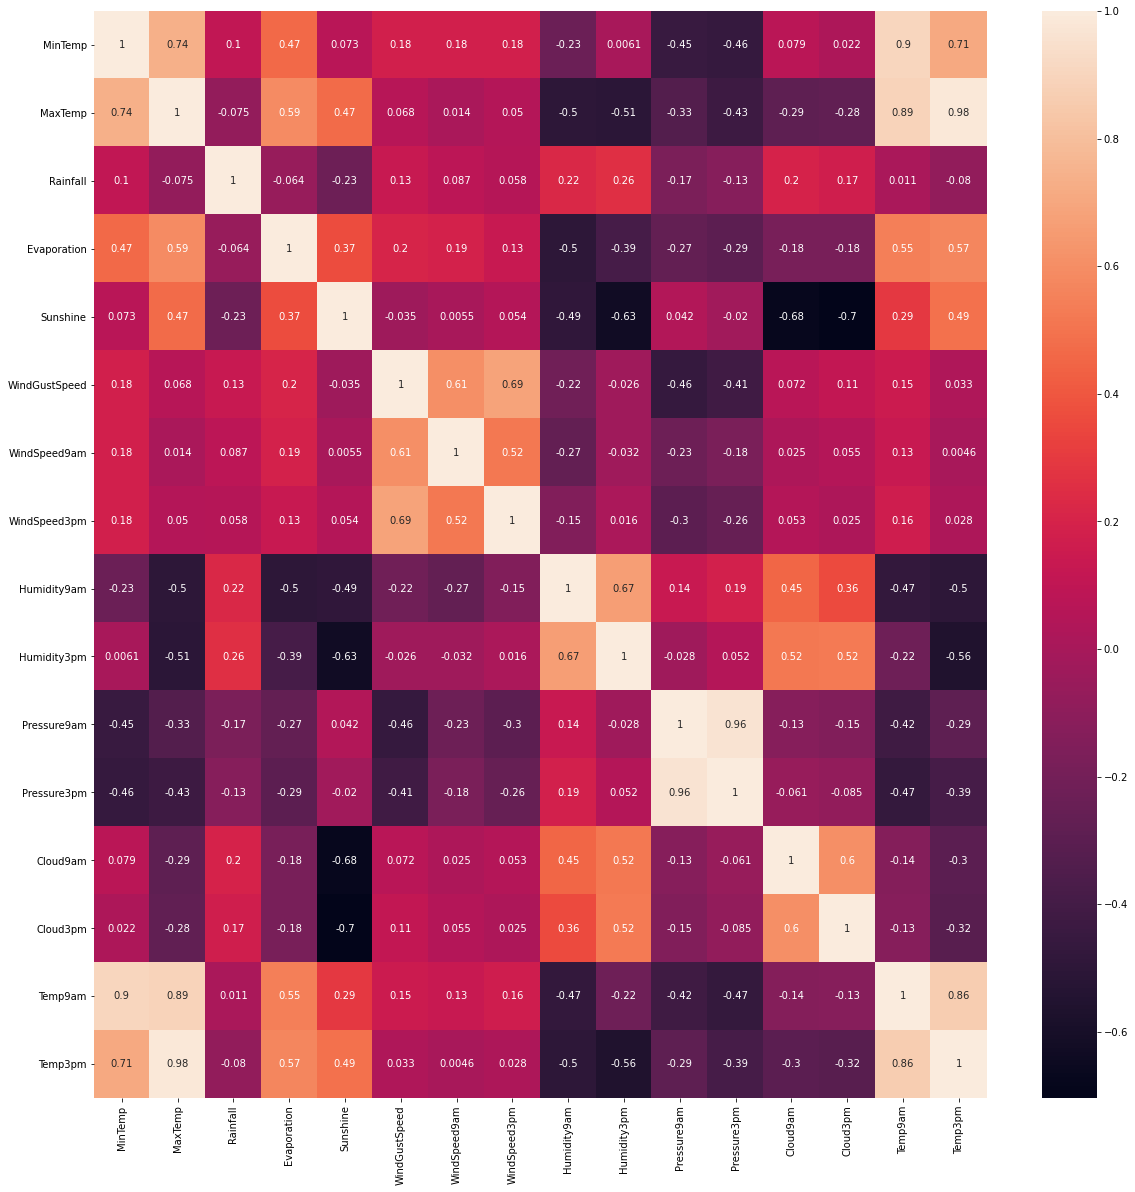

In [11]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

De los gráficos anteriores podemos notar que:
- Las variables asociadas a temperaturas MinTemp, MaxTemp, Temp9am y Temp3pm están bastante correlacionadas.
- La variable Rainfall está un poco correlacionada con las variables asociadas al nivel de humedad Humidity9am y Humidity3pm.
- Las variables asociadas al viento están bastante correlacionadas entre sí, pero además WindGustSpeed presenta alguna correlación con las variables relativas a la presión Pressure9am y Pressure3pm.
- Las variables de humedad Humidity9am y Humididty3pm tienen cierta correlación con las temperaturas del día, además de estar correlacionadas entre sí.
- Las variables de presión también se encuentran correlacionadas entre sí, pero además presentan cierta correlación con las variables de temperatura y de velocidad de ráfagas de viento.

##### Variables categóricas

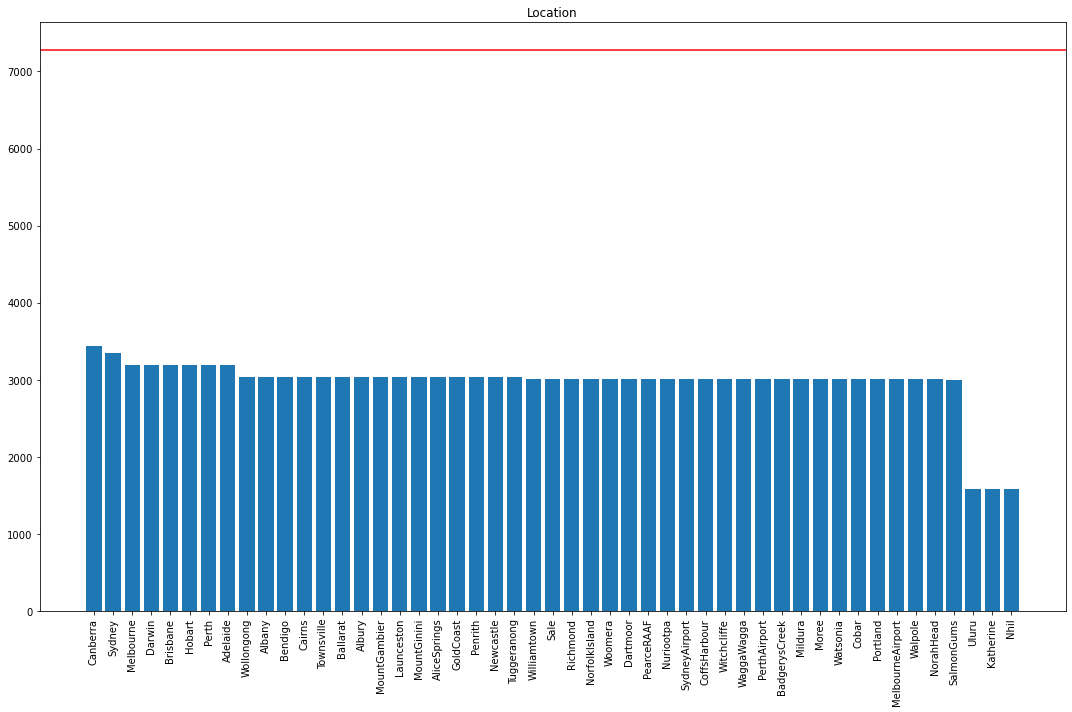

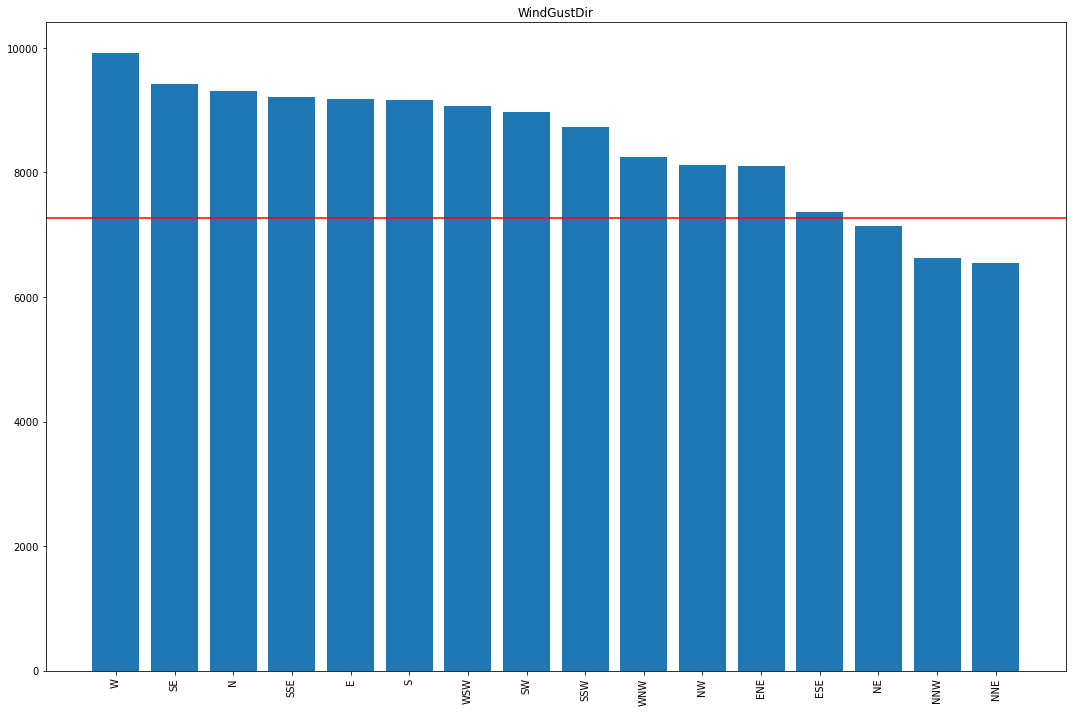

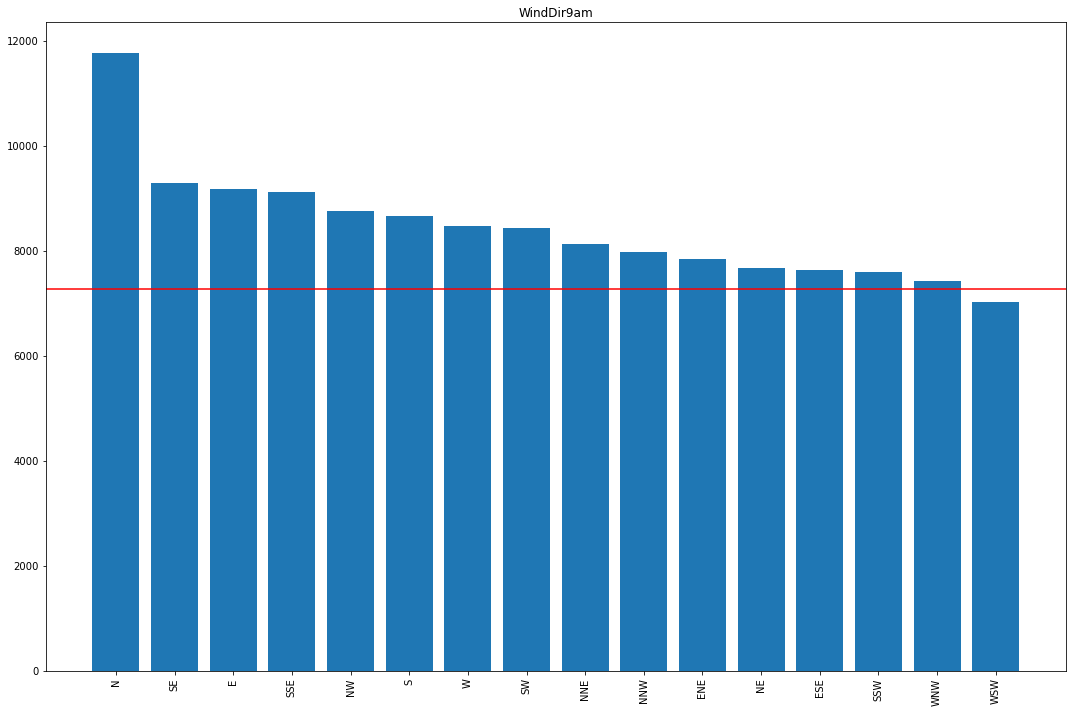

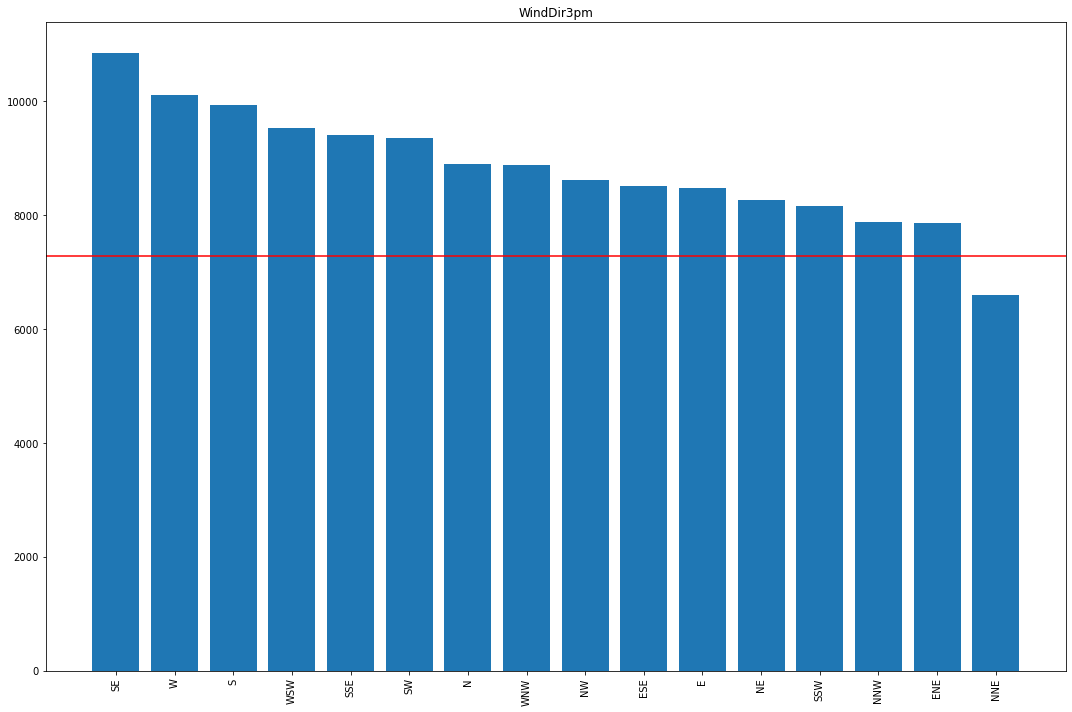

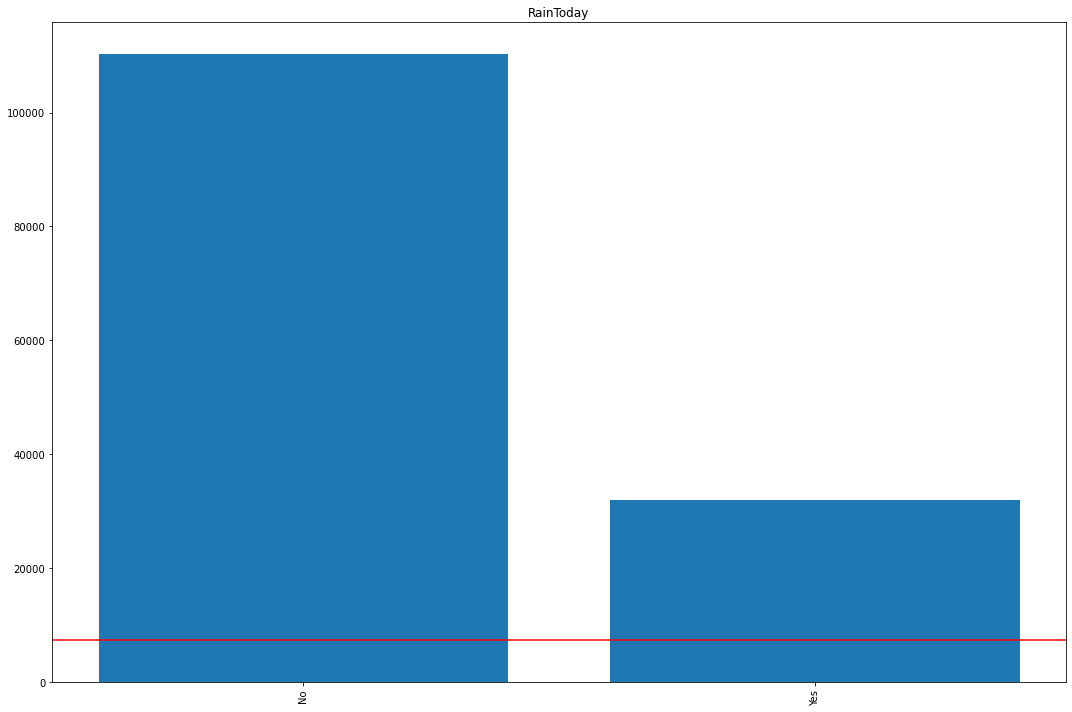

In [12]:
cat_var=data.select_dtypes(include='object').drop('RainTomorrow',axis=1)
for i in range(len(cat_var.columns)):
    var_name=cat_var.columns[i]
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title(var_name)
    ax.bar(cat_var[var_name].value_counts().index, cat_var[var_name].value_counts().values)
    ax.axhline(y=0.05*len(cat_var[var_name]), color='red')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

- Location: Las ciudades más importantes están más representadas en el dataset que ciudades más pequeñas. Sin embargo, al tener muchas ciudades ninguna llega a representar el 5% de los datos.
- WindGustDir: Los vientos más fuertes provienen del oeste. Los vientos fuertes de NE, NNW y NNE representan menos del 5% cada uno.
- WindDir9am: La mayoría de los vientos de la mañana provienen del norte. Todos los vientos menos los provenientes del WSW representan al menos el 5% de las muetras cada uno.
- WindDir3pm: La mayoría de los vientos de la tarde provienen del sureste. Todos los vientos menos los provenientes del NNE representan al menos el 5% de las muetras cada uno.
- RainToday: Los días en que sí llovió están subrepresentados respecto a los días en los que no llovió.

<AxesSubplot:>

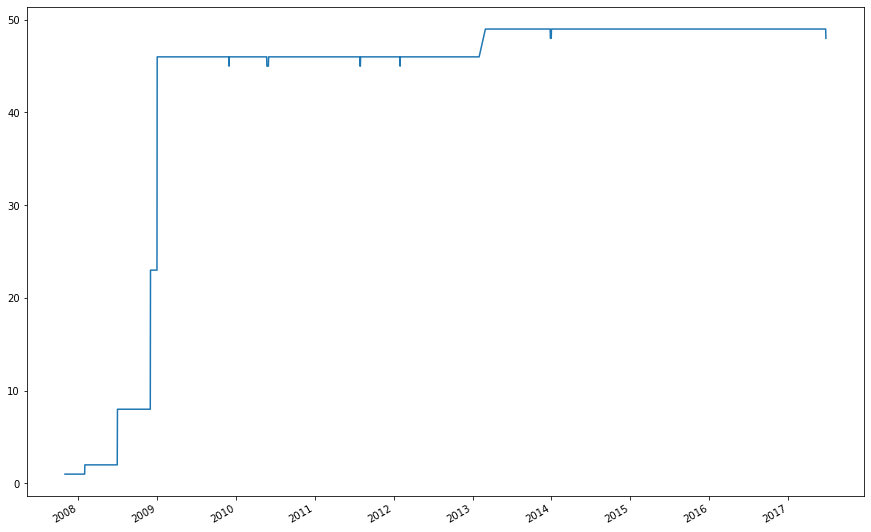

In [13]:
plt.subplots(figsize=(15,10))
data["Date"].value_counts().plot()

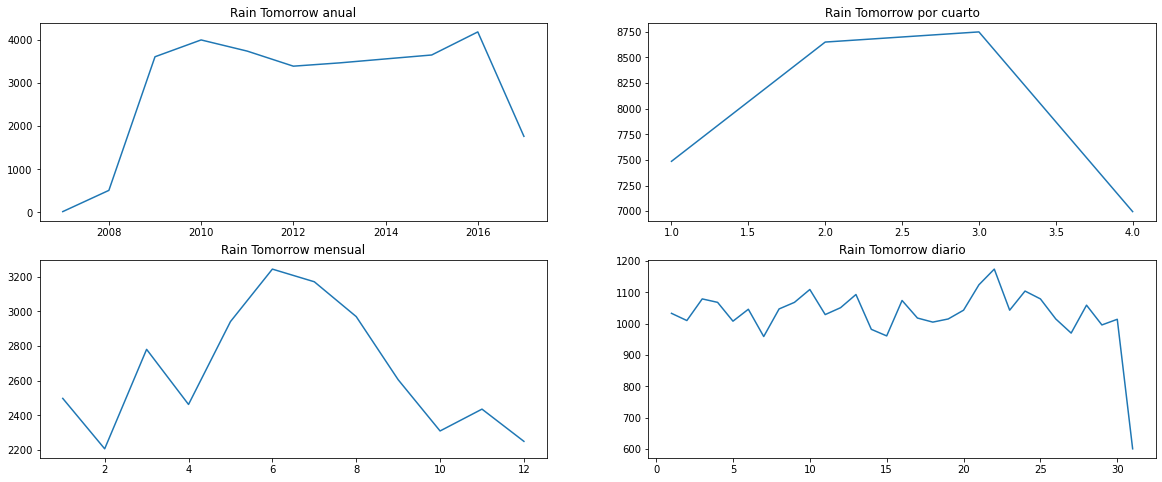

In [14]:
data_raintomorrow_binaria = data.copy()
data_raintomorrow_binaria.loc[data_raintomorrow_binaria['RainTomorrow']=='Yes',"RainTomorrow"] = 1
data_raintomorrow_binaria.loc[data_raintomorrow_binaria['RainTomorrow']=='No',"RainTomorrow"] = 0
data_raintomorrow_binaria.loc[:,"RainTomorrow"] = data_raintomorrow_binaria["RainTomorrow"].astype('float64')
plt.subplots(figsize=(20,8))
plt.subplot(2,2,1)
plt.title("Rain Tomorrow anual")
plt.plot(data_raintomorrow_binaria.groupby(by=data_raintomorrow_binaria["Date"].dt.year).sum()["RainTomorrow"])
plt.subplot(2,2,2)
plt.title("Rain Tomorrow por cuarto")
plt.plot(data_raintomorrow_binaria.groupby(by=data_raintomorrow_binaria["Date"].dt.quarter).sum()["RainTomorrow"])
plt.subplot(2,2,3)
plt.title("Rain Tomorrow mensual")
plt.plot(data_raintomorrow_binaria.groupby(by=data_raintomorrow_binaria["Date"].dt.month).sum()["RainTomorrow"])
plt.subplot(2,2,4)
plt.title("Rain Tomorrow diario")
plt.plot(data_raintomorrow_binaria.groupby(by=data_raintomorrow_binaria["Date"].dt.day).sum()["RainTomorrow"])

De acuerdo a los gráficos anteriores podríamos descomponer la variable Date en el componente anual,el mensual y el diario aunque evidentemente la mayor influencia en la variable Rain Tomorrow se corresponde con el mes y no tanto con el día o el año.

- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

<AxesSubplot:title={'center':'RainTomorrow'}>

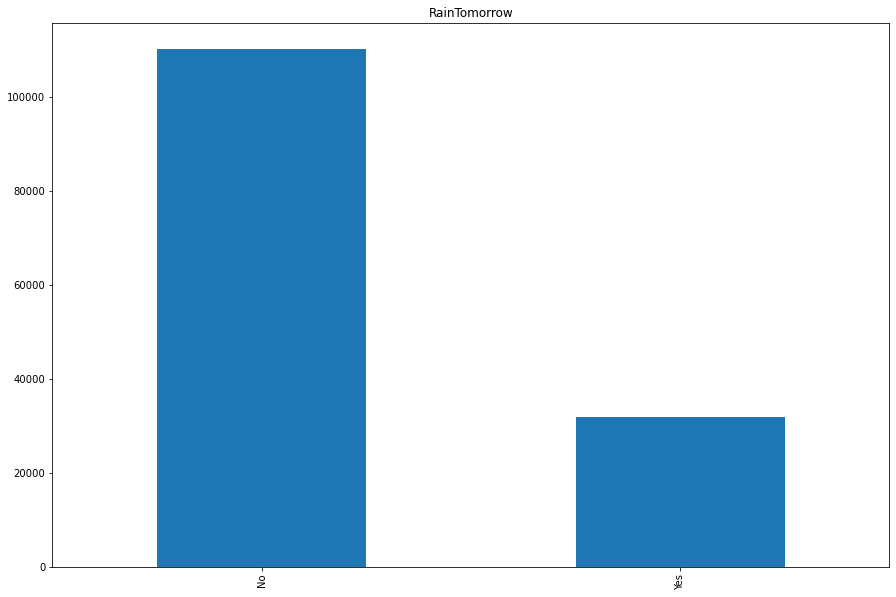

In [15]:
plt.subplots(figsize=(15,10))
plt.title('RainTomorrow')
data['RainTomorrow'].value_counts().plot(kind='bar')

Tal como pasaba con la variable RainToday, la variable objetivo RainTomorrow también está desbalanceada. El valor 'yes' está subrepresentado respecto al valor 'No'.

Para encodear la variable objetivo transformaremos el valor "Yes" en 1 y el valor "No" en 0. De esta manera, la variable categórica se transformará en una variable numérica binaria con solo dos resultados posibles 1 o 0.

In [16]:
data.loc[data['RainTomorrow']=='Yes',"RainTomorrow"] = 1
data.loc[data['RainTomorrow']=='No',"RainTomorrow"] = 0

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

Antes de separar el dataset en train y test, vamos a eliminar las filas que contengan valores nulos en la variable de salida "RainTomorrow". Esto lo hacemos porque al no tener un valor de salida para esa fila, no podríamos comparar el resultado de la predicción con el valor real.
Comprobamos que el % de valores faltantes en esta variable es pequeño (2.2%), por lo que tiene sentido eliminarlos.

In [17]:
data["RainTomorrow"].isna().sum() / len(data)

0.02245978275814657

In [18]:
data.dropna(axis=0,subset=["RainTomorrow"], inplace=True)

In [19]:
data["RainTomorrow"].isna().sum()

0

In [20]:
X = data.iloc[:,:-1]
y = data.loc[:,'RainTomorrow']
y = y.astype('int')

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Hago esto para evitar hacer cambios sobre slices
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.

In [23]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("El dataset tiene " + str(df.shape[1]) + " columns.\n"      
            "Hay " + str(mis_val_table_ren_columns.shape[0]) +
              " columnas con valores faltantes.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [24]:
missing_values_table(X)

El dataset tiene 22 columns.
Hay 20 columnas con valores faltantes.


Missing Values  % of Total Values
Sunshine                67816               47.7
Evaporation             60843               42.8
Cloud3pm                57094               40.2
Cloud9am                53657               37.7
Pressure9am             14014                9.9
Pressure3pm             13981                9.8
WindDir9am              10013                7.0
WindGustDir              9330                6.6
WindGustSpeed            9270                6.5
WindDir3pm               3778                2.7
Humidity3pm              3610                2.5
Temp3pm                  2726                1.9
WindSpeed3pm             2630                1.8
Humidity9am              1774                1.2
RainToday                1406                1.0
Rainfall                 1406                1.0
WindSpeed9am             1348                0.9
Temp9am                   904                0.6
MinTemp                   637                0.4
MaxTemp                   322                0.2

- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 

Para entender un poco más la distribución y posibles causas de los valores faltantes en cada variable, haremos uso de la librería missingno (https://github.com/ResidentMario/missingno) que nos brinda distintas herramientas visuales para tratamiento de valores faltantes.

<AxesSubplot:>

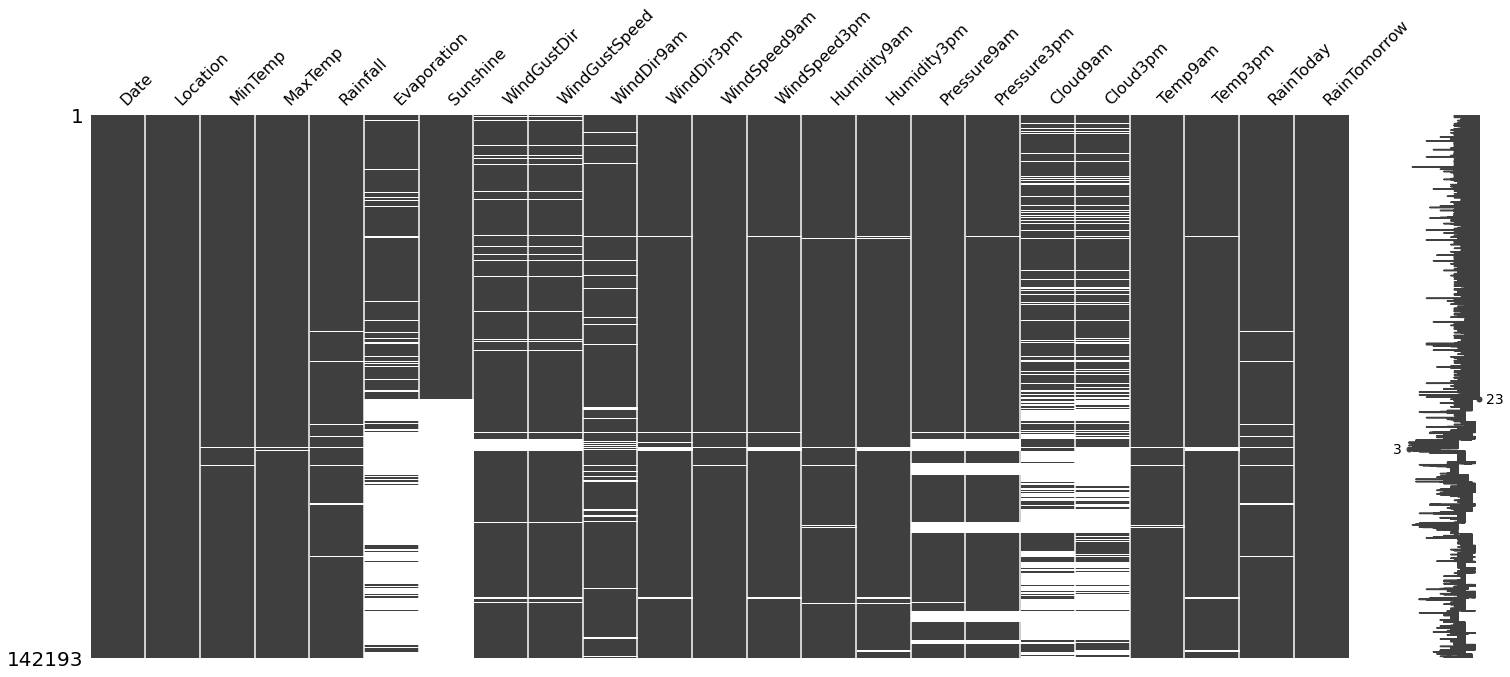

In [25]:
msno.matrix(data.sort_values(by="Sunshine"))

<AxesSubplot:>

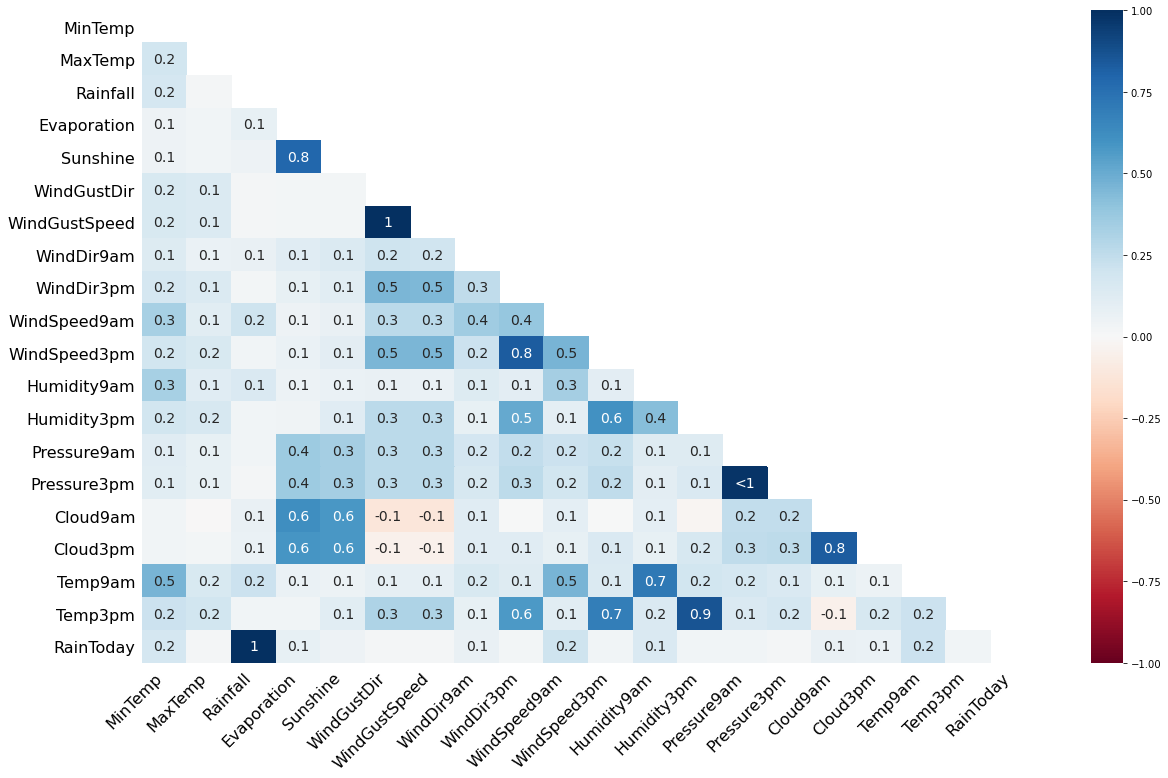

In [26]:
msno.heatmap(data)

De los gráficos anteriores podemos decir que:
- Los valores faltantes de la variable Sunshine están muy relacionados con los valores faltantes de la variable Evaporation. Puede que estas mediciones hayan sido tomadas en algún momento particular del estudio (comienzo o final) o que hayan sido tomadas en algunas ubicaciones y en otras no. También podemos considerar la posibilidad de que el instrumento medidor tenga fallas de registro.
- Los valores faltantes de MinTemp, MaxTemp son muy pocos y parecen ser totalmente aleatorios.
- Los valores faltantes de variables asociadas a características del viento también parecen estar relacionadas. No son muchos, pero podemos imaginar que pueden estar asociados a algún momento del tiempo, a algunas ubicaciones o a fallas en/falta de equipos de registro.
- Los valores faltantas de las variables asociadas a la presión también se encuentran muy relacionados y aquí nuevamente las hipótesis que podríamos considerar son que hubo momentos en el estudio en que no se tomó esta información, a que existen ubicaciones sin equipamiento para registrar esta información o a que el equipamiento falló en ciertas ocasiones.
- Los valores faltantes asociados a la presencia de nubes también están muy relacionadas entre sí y no tanto con las demás. Aunque sí puede notarse que la mayor cantidad de datos faltantes en estas vairables corresponden a registro que también tienen datos faltantes en la variable Sunshine y/o en Evaporation.
- Por último, los valores faltantes de RainToday están totalmente correlacionados con los de Rainfall y los de Temperatura (Temp9am y Temp3pm) están muy relacionados con valores faltantes en las variables asociadas a la humedad en cada momento del día.

In [27]:
# Eliminamos las filas con valores faltantes en las columnas MaxTemp, MinTemp, Temp9am, WindSpeed9am, Rainfall, RainToday ya que la eliminación de estos registros representa la eliminación de menos del 5% del total
print("Porcentaje de pérdida en Train: ",np.sum(X_train[["MaxTemp", "MinTemp", "Temp9am", "WindSpeed9am", "Rainfall", "RainToday"]].isna().sum()) / len(X_train))
print("Porcentaje de pérdida en Test: ",np.sum(X_test[["MaxTemp", "MinTemp", "Temp9am", "WindSpeed9am", "Rainfall", "RainToday"]].isna().sum()) / len(X_test))

Porcentaje de pérdida en Train:  0.042635863354255676
Porcentaje de pérdida en Test:  0.04124617602587995


In [28]:
X_train.dropna(axis=0,subset=["MaxTemp", "MinTemp", "Temp9am", "WindSpeed9am", "Rainfall", "RainToday"], inplace=True)
X_test.dropna(axis=0,subset=["MaxTemp", "MinTemp", "Temp9am", "WindSpeed9am", "Rainfall", "RainToday"], inplace=True)
y_train = y_train.loc[X_train.index]
y_test = y_test.loc[X_test.index]

Ahora procederemos a investigar un poco más las razones por las que pueden estar faltando los datos de las demás variables. Particularmente las de Evaporation, Sunshine, Cloud9am y Cloud3pm.
Para esto, primero veremos si corresponden a períodos de tiempo específicos o si ocurren en todo el período analizado.

<AxesSubplot:>

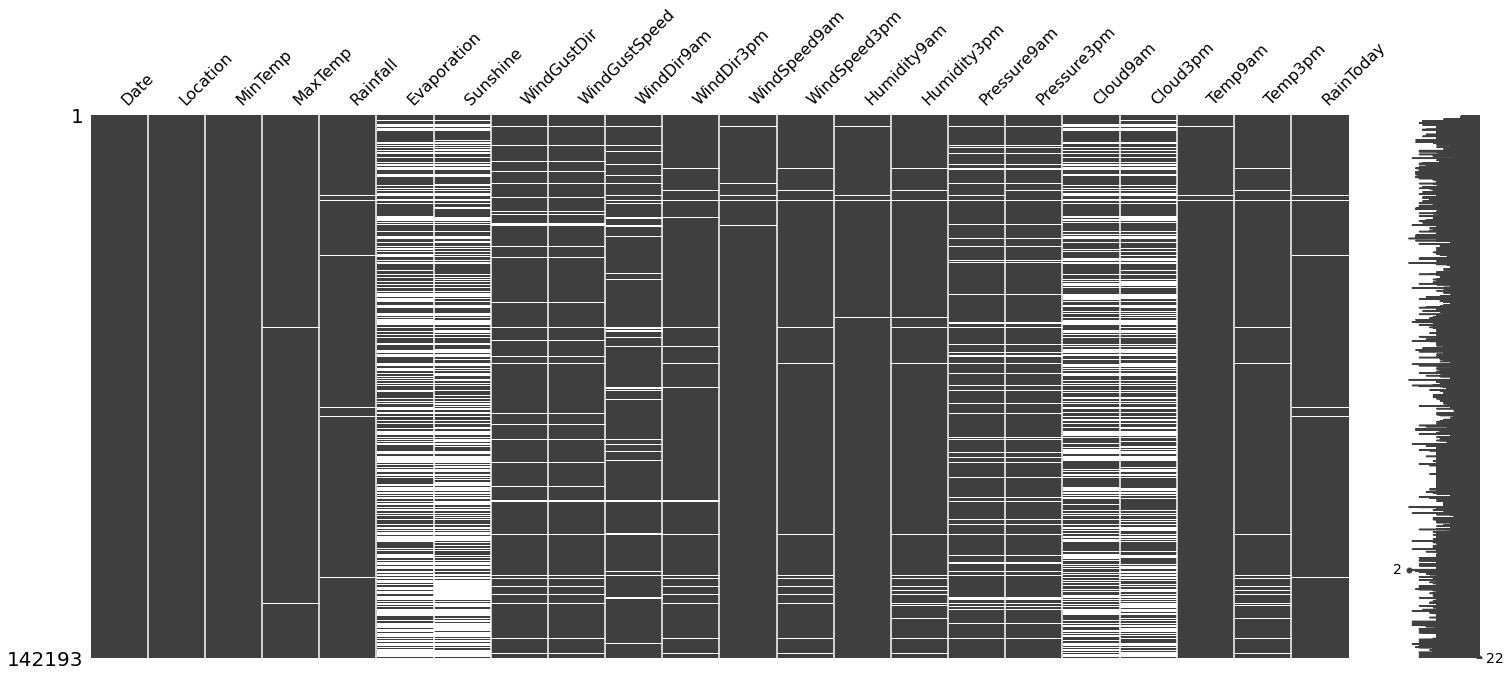

In [29]:
msno.matrix(X.sort_values(by="Date"))

Al ordenar los datos por fecha, no logramos detectar ningún período de tiempo particular con el que pueda estar asociada la falta de valores para las variables antes descriptas.

Por lo tanto, ahora verificaremos si los datos faltantes ocurren en todas las localidades o si pertenecen a localidades específicas. Para eso, ordenamos la matriz según Location,

<AxesSubplot:>

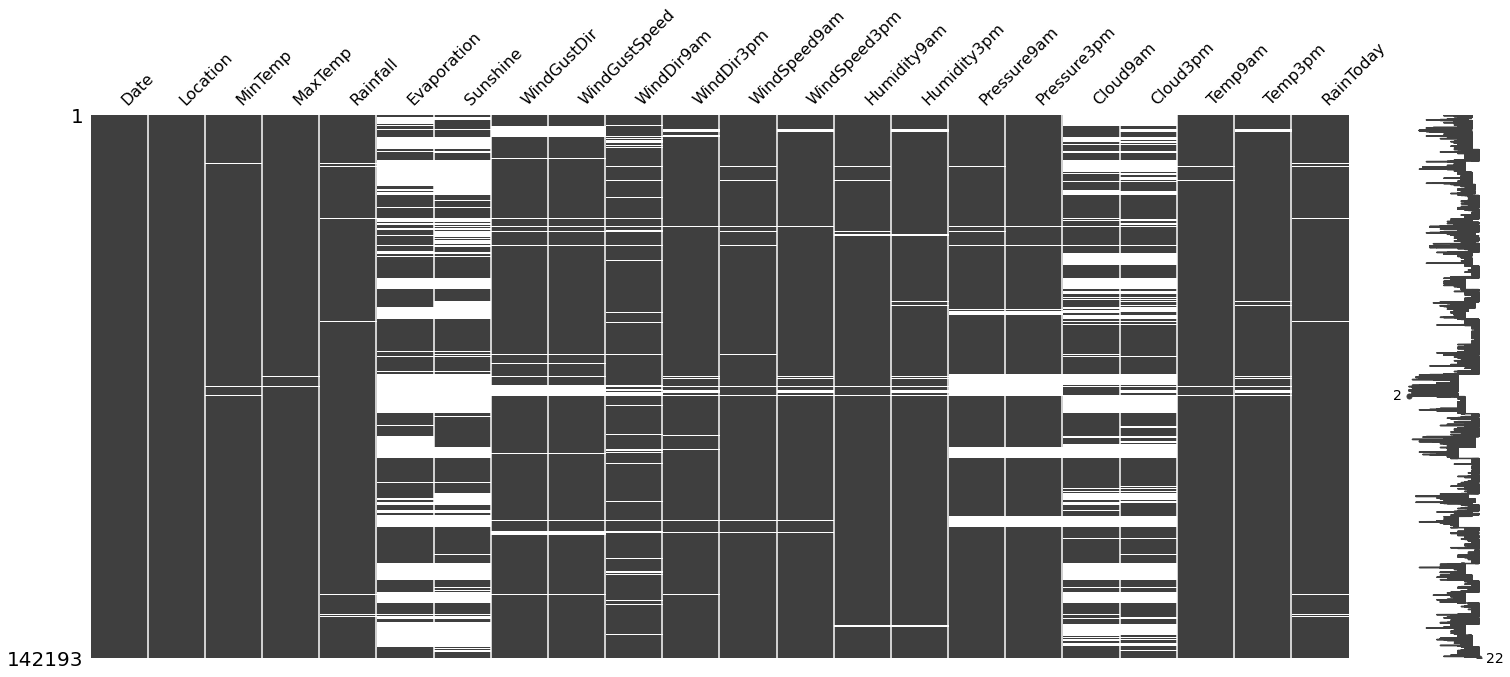

In [30]:
msno.matrix(X.sort_values(by="Location"))

Al ordenar por ubicación, puede suponerse que hay ciertas ubicaciones que tienen más datos faltantes que otras. Ahora computaremos la cantidad de datos faltantes en cada ubicación, para identificar cuáles son las más afectadas y si esto puede ayudarnos a entender mejor el problema y definir una mejor solución.

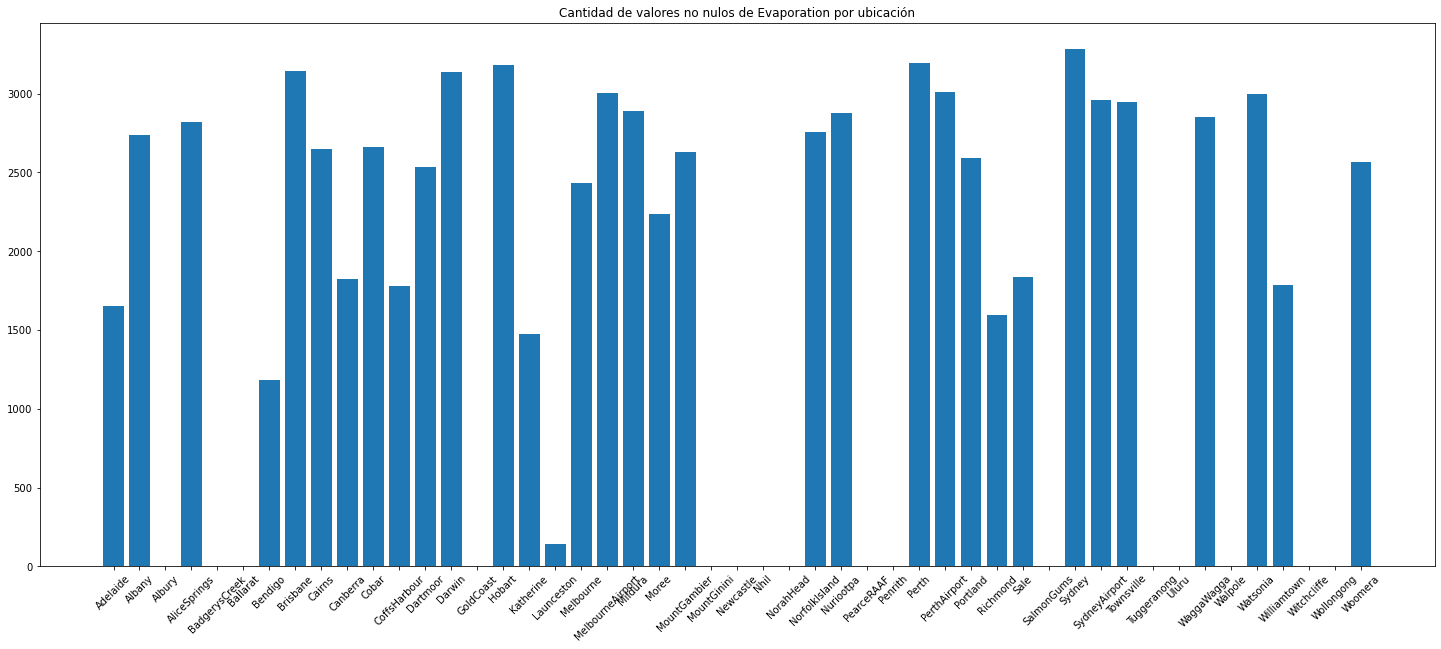

In [31]:
plt.subplots(figsize=(25,10))
plt.bar(X.loc[:,["Location","Evaporation"]].groupby(by="Location").count()["Evaporation"].index, X.loc[:,["Location","Evaporation"]].groupby(by="Location").count()["Evaporation"].values)
plt.title("Cantidad de valores no nulos de Evaporation por ubicación")
plt.xticks(rotation=45)
plt.show()

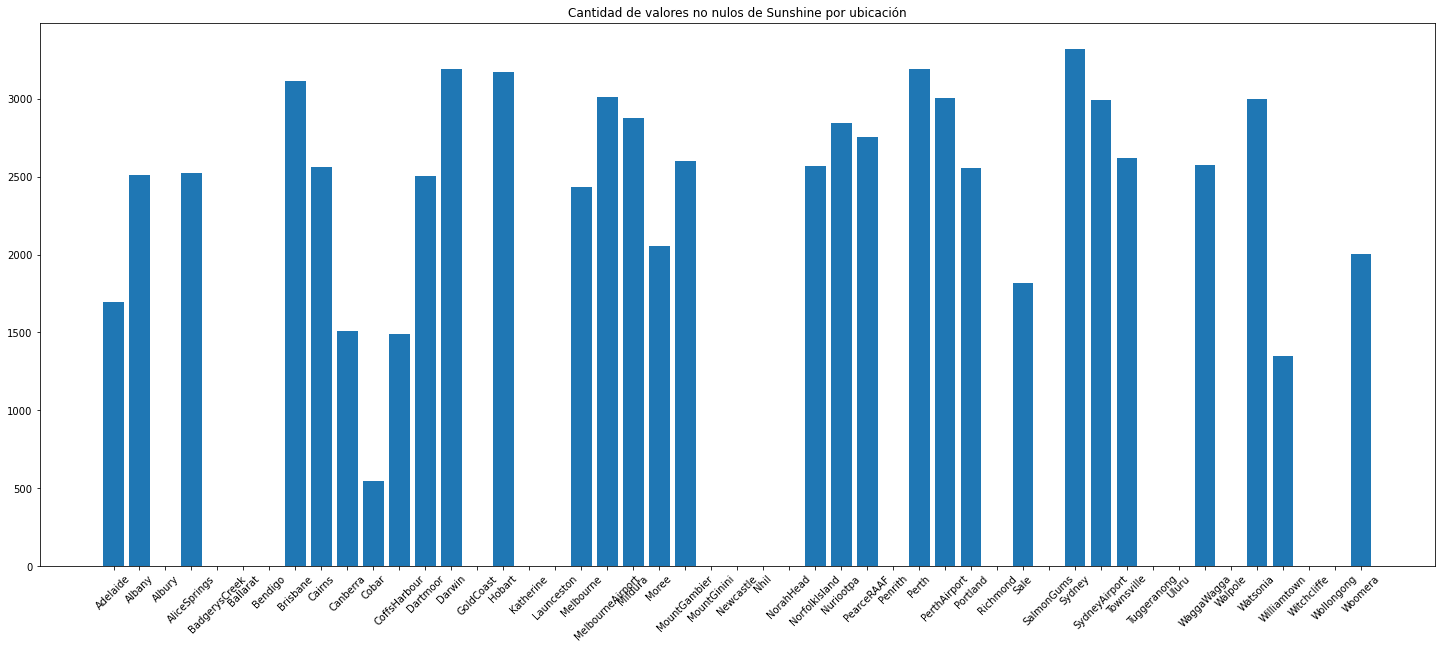

In [32]:
plt.subplots(figsize=(25,10))
plt.bar(X.loc[:,["Location","Sunshine"]].groupby(by="Location").count()["Sunshine"].index, X.loc[:,["Location","Sunshine"]].groupby(by="Location").count()["Sunshine"].values)
plt.title("Cantidad de valores no nulos de Sunshine por ubicación")
plt.xticks(rotation=45)
plt.show()

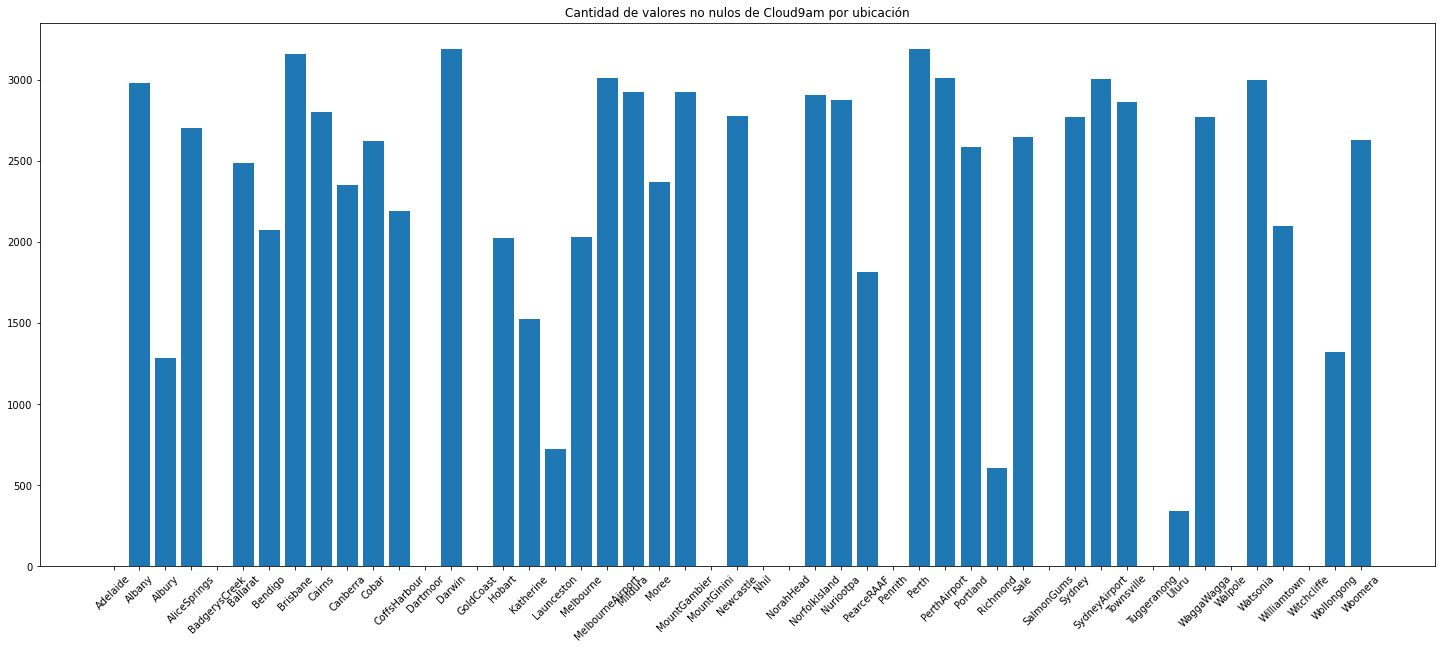

In [33]:
plt.subplots(figsize=(25,10))
plt.bar(X.loc[:,["Location","Cloud9am"]].groupby(by="Location").count()["Cloud9am"].index, X.loc[:,["Location","Cloud9am"]].groupby(by="Location").count()["Cloud9am"].values)
plt.title("Cantidad de valores no nulos de Cloud9am por ubicación")
plt.xticks(rotation=45)
plt.show()

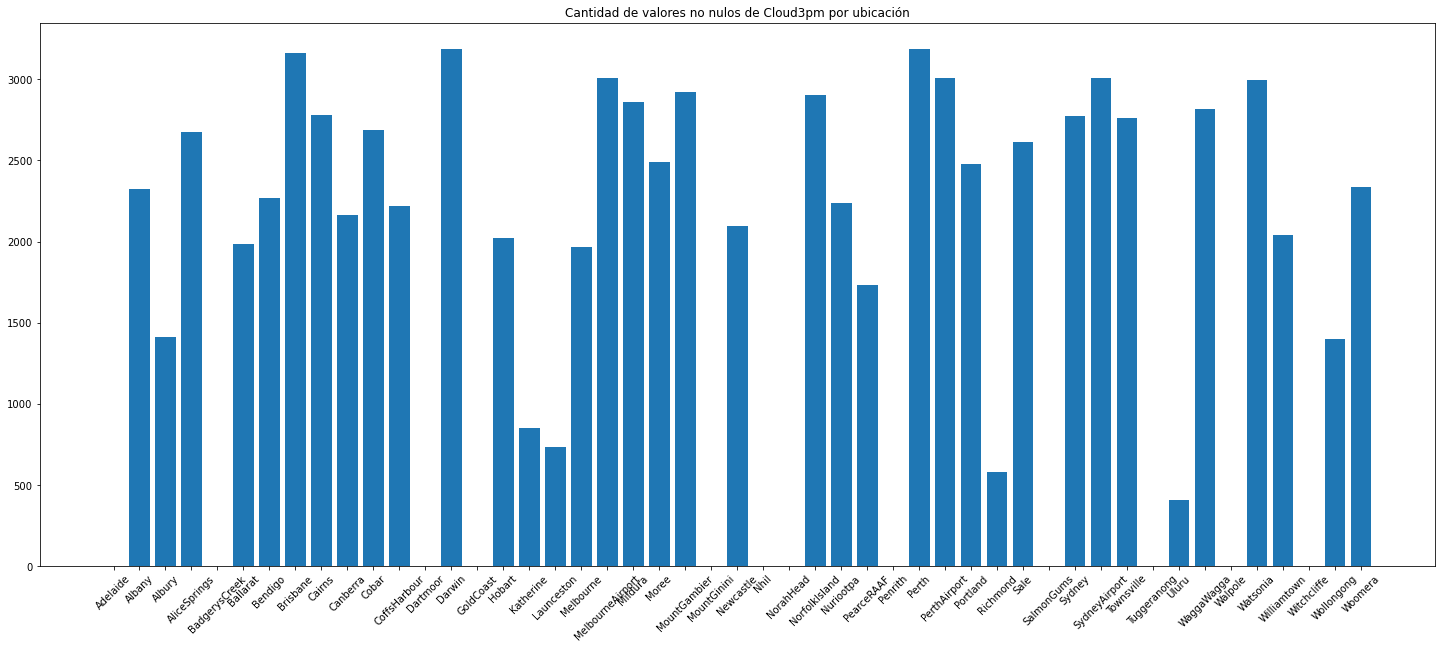

In [34]:
plt.subplots(figsize=(25,10))
plt.bar(X.loc[:,["Location","Cloud3pm"]].groupby(by="Location").count()["Cloud3pm"].index, X.loc[:,["Location","Cloud3pm"]].groupby(by="Location").count()["Cloud3pm"].values)
plt.title("Cantidad de valores no nulos de Cloud3pm por ubicación")
plt.xticks(rotation=45)
plt.show()

Como podemos ver en los gráficos anteriores, los datos faltantes faltan por ciudades completas, por lo que podríamos inferir que en esas ciudades no existe equipamiento capaz de medir estas variables. Como los valores faltantes en cada variable representan más del 37% de los datos en cada variable y la razón de que estos datos falten no es aleatoria, decidimos eliminar estas variables del dataset.

In [35]:
X_train.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"], inplace = True)
X_test.drop(columns=["Evaporation","Sunshine","Cloud9am","Cloud3pm"], inplace = True)

In [36]:
missing_values_table(X_train)

El dataset tiene 18 columns.
Hay 10 columnas con valores faltantes.


Missing Values  % of Total Values
Pressure3pm             10089                9.1
Pressure9am             10035                9.0
WindDir9am               6825                6.1
WindGustDir              6298                5.7
WindGustSpeed            6266                5.6
Humidity3pm              2446                2.2
WindDir3pm               2172                2.0
Temp3pm                  1775                1.6
WindSpeed3pm             1281                1.2
Humidity9am               661                0.6

In [37]:
# Para los valores faltantes de las variables categóricas imputaremos por la moda o valor más frecuente y para las variables numéricas por la mediana
imputer_median = SimpleImputer(strategy='median')
imputer_mode = SimpleImputer(strategy='most_frequent')

# Variables numéricas
imputer_median.fit(X_train.loc[:,X_train.select_dtypes(exclude=['object','datetime64[ns]']).columns])
X_train_numeric = imputer_median.transform(X_train.loc[:,X_train.select_dtypes(exclude=['object','datetime64[ns]']).columns])
X_test_numeric = imputer_median.transform(X_test.loc[:,X_test.select_dtypes(exclude=['object','datetime64[ns]']).columns])

X_train.loc[:,X_train.select_dtypes(exclude=['object','datetime64[ns]']).columns] = X_train_numeric
X_test.loc[:,X_test.select_dtypes(exclude=['object','datetime64[ns]']).columns] = X_test_numeric


# Variables categóricas
imputer_mode.fit(X_train.loc[:,X_train.select_dtypes(include=['object','datetime64[ns]']).columns])
X_train_categoric = imputer_mode.transform(X_train.loc[:,X_train.select_dtypes(include=['object','datetime64[ns]']).columns])
X_test_categoric = imputer_mode.transform(X_test.loc[:,X_test.select_dtypes(include=['object','datetime64[ns]']).columns])

X_train.loc[:,X_train.select_dtypes(include=['object','datetime64[ns]']).columns] = X_train_categoric
X_test.loc[:,X_test.select_dtypes(include=['object','datetime64[ns]']).columns] = X_test_categoric

- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.

In [38]:
# Variable Date: Vamos a codificar en un componente anual, uno mensual y otro diario
X_train["Year"] = X_train.loc[:,"Date"].dt.year.astype('float64')
X_test["Year"] = X_test.loc[:,"Date"].dt.year.astype('float64')

X_train["Month"] = X_train.loc[:,"Date"].dt.month.astype('float64')
X_test["Month"] = X_test.loc[:,"Date"].dt.month.astype('float64')

X_train["Day"] = X_train.loc[:,"Date"].dt.day.astype('float64')
X_test["Day"] = X_test.loc[:,"Date"].dt.day.astype('float64')

X_train.drop(columns="Date", inplace=True)
X_test.drop(columns="Date", inplace=True)

In [39]:
# Las ciudades las codificaremos haciendo OHE
X_train = pd.get_dummies (X_train, columns = ["Location"])
X_test = pd.get_dummies (X_test, columns = ["Location"])

In [40]:
# Las direcciones de los vientos las codificaremos según el ángulo al que corresponden
dict_dirs= {"N": 348.75, "NNE": 11.25 , "NE": 33.75 , "ENE": 56.25 , "E": 78.75 , "ESE": 101.25, "SE": 123.75, "SSE": 146.25, "S": 168.75, "SSW": 191.25, "SW": 213.75, "WSW": 236.25, "W": 258.75, "WNW": 281.25, "NW": 303.75, "NNW": 326.25}
X_train.loc[:,"WindGustDir"] = X_train["WindGustDir"].map(dict_dirs)
X_train.loc[:,"WindDir9am"] = X_train["WindDir9am"].map(dict_dirs)
X_train.loc[:,"WindDir3pm"] = X_train["WindDir3pm"].map(dict_dirs)

X_test.loc[:,"WindGustDir"] = X_test["WindGustDir"].map(dict_dirs)
X_test.loc[:,"WindDir9am"] = X_test["WindDir9am"].map(dict_dirs)
X_test.loc[:,"WindDir3pm"] = X_test["WindDir3pm"].map(dict_dirs)

In [41]:
# La variable RainToday la codificaremos con un 1 para cuando tome el valor Yes y con un 0 para cuando tome el valor No
X_train.loc[X_train["RainToday"]=='No',"RainToday"] = 0
X_train.loc[X_train["RainToday"]=='Yes',"RainToday"] = 1
X_train["RainToday"] = X_train.loc[:,"RainToday"].astype('float64')


X_test.loc[X_test["RainToday"]=='No',"RainToday"] = 0
X_test.loc[X_test["RainToday"]=='Yes',"RainToday"] = 1
X_test["RainToday"] = X_test.loc[:,"RainToday"].astype('float64')

#### Detección y tratamiento de outliers

Como no todas las distribuciones de nuestras variables corresponden o se asemejan a una distribución normal, utiizaremos la técnica de IQR para detección de valores extremos y luego eliminaremos esas muestras.

In [42]:
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

outliers_list = []
for i in ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday']:
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train,i,1.5)
    outliers = np.where(X_train[i] > upper_boundary, True, np.where(X_train[i] < lower_boundary, True, False))
    outliers_list.append(outliers)

In [43]:
X_train_trimmed=X_train.copy()
X_train_trimmed=X_train_trimmed.loc[~(outliers_list[0]+outliers_list[1]+outliers_list[2]+outliers_list[3]+
                     outliers_list[4]+outliers_list[5]+outliers_list[6]+outliers_list[7]+
                     outliers_list[8]+outliers_list[9]+outliers_list[10]+outliers_list[11]+
                     outliers_list[12]+outliers_list[13]+outliers_list[14]+outliers_list[15]),]

In [44]:
len(X_train_trimmed) / len(X_train)

0.7235650906211192

Con este método perderíamos el 28% de nuestros datos de entrenamiento. Vamos a probar también el algoritmo LOF de SKLearn para ver si tenemos mejores resultados.

In [45]:
#Benchmark
#Estandarizar datos
scale=StandardScaler()
scale.fit(X_train)
X_train_con_outliers = scale.transform(X_train)
X_test_con_outliers = scale.transform(X_test)

# Entrenar con todos los datos
model = LogisticRegression()
model = model.fit(X_train_con_outliers,y_train)

# Predecir en test set
yhat = model.predict(X_test_con_outliers)
report = classification_report(y_test, yhat)

print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21638
           1       0.74      0.50      0.60      6152

    accuracy                           0.85     27790
   macro avg       0.80      0.72      0.75     27790
weighted avg       0.84      0.85      0.84     27790



In [46]:
#Sin outliers IQR
#Estandarizar datos
scale=StandardScaler()
scale.fit(X_train_trimmed)
X_train_sin_outliers_IQR = scale.transform(X_train_trimmed)
X_test_sin_outliers_IQR = scale.transform(X_test)

# Entrenar con los datos sin outliers
model2 = LogisticRegression()
model2 = model2.fit(X_train_sin_outliers_IQR,y_train[X_train_trimmed.index])

# Predecir en test set
yhat = model2.predict(X_test_sin_outliers_IQR)
report = classification_report(y_test, yhat)

print(report )

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     21638
           1       0.60      0.61      0.61      6152

    accuracy                           0.82     27790
   macro avg       0.74      0.75      0.75     27790
weighted avg       0.82      0.82      0.82     27790



In [47]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train.loc[:,['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday']]) 
outliers_idx = (yhat == -1)

print("Outliers encontrados:",np.sum(outliers_idx))
#Estandarizar datos
scale=StandardScaler()
scale.fit(X_train[~outliers_idx])
X_train_sin_outliers_LOF = scale.transform(X_train[~outliers_idx])
X_test_sin_outliers_LOF = scale.transform(X_test)


Outliers encontrados: 961


In [48]:
# Entrenar con los datos sin outliers
model = LogisticRegression()
model = model.fit(X_train_sin_outliers_LOF,y_train[~outliers_idx])

# Predecir en test set
yhat = model.predict(X_test_sin_outliers_LOF)
report = classification_report(y_test, yhat)

print(report )

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21638
           1       0.74      0.50      0.60      6152

    accuracy                           0.85     27790
   macro avg       0.80      0.72      0.75     27790
weighted avg       0.84      0.85      0.84     27790



Como puede verse, tanto con la eliminación de outliers por el método de IQR como por el método LOF descartamos parte del dataset (gran parte con IQR) y no mejoramos las métricas de performance de nuestro modelo.
Por lo tanto, nos quedaremos con los conjuntos definidos por LOF que eliminan algunos registros pero no tantos como sí lo hace IQR.

In [49]:
X_train = X_train[~outliers_idx].copy()
y_train = y_train[~outliers_idx].copy()

In [50]:
X_train.to_csv("X_train.csv")
y_train.to_csv("y_train.csv")
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

##### Análisis de la varianza de las features

In [51]:
var = np.var(X_train, axis=0)

In [52]:
var.sort_values(ascending=False).head(60)

WindDir9am                   11946.611799
WindDir3pm                    9951.345762
WindGustDir                   9834.821279
Humidity3pm                    421.846334
Humidity9am                    361.059208
WindGustSpeed                  170.177187
WindSpeed9am                    77.433221
Day                             77.410418
WindSpeed3pm                    75.408920
Rainfall                        54.529957
MaxTemp                         50.196287
Temp3pm                         47.204879
Pressure9am                     45.616365
Pressure3pm                     44.698330
Temp9am                         42.176746
MinTemp                         40.759185
Month                           11.694313
Year                             6.460256
RainToday                        0.171715
Location_Sydney                  0.022967
Location_Perth                   0.022577
Location_Canberra                0.022482
Location_Brisbane                0.022344
Location_Hobart                  0

Podemos ver que las variables asociadas al viento y a la humedad son las que tienen mayor varianza y las variables binarias que hacen referencia a las ubicaciones las que menos varianza tienen. Lo cual es lógico, porque estas últimas tienen solo dos valores posibles, 1 o 0.

##### Análisis de la correlación de las features

<AxesSubplot:>

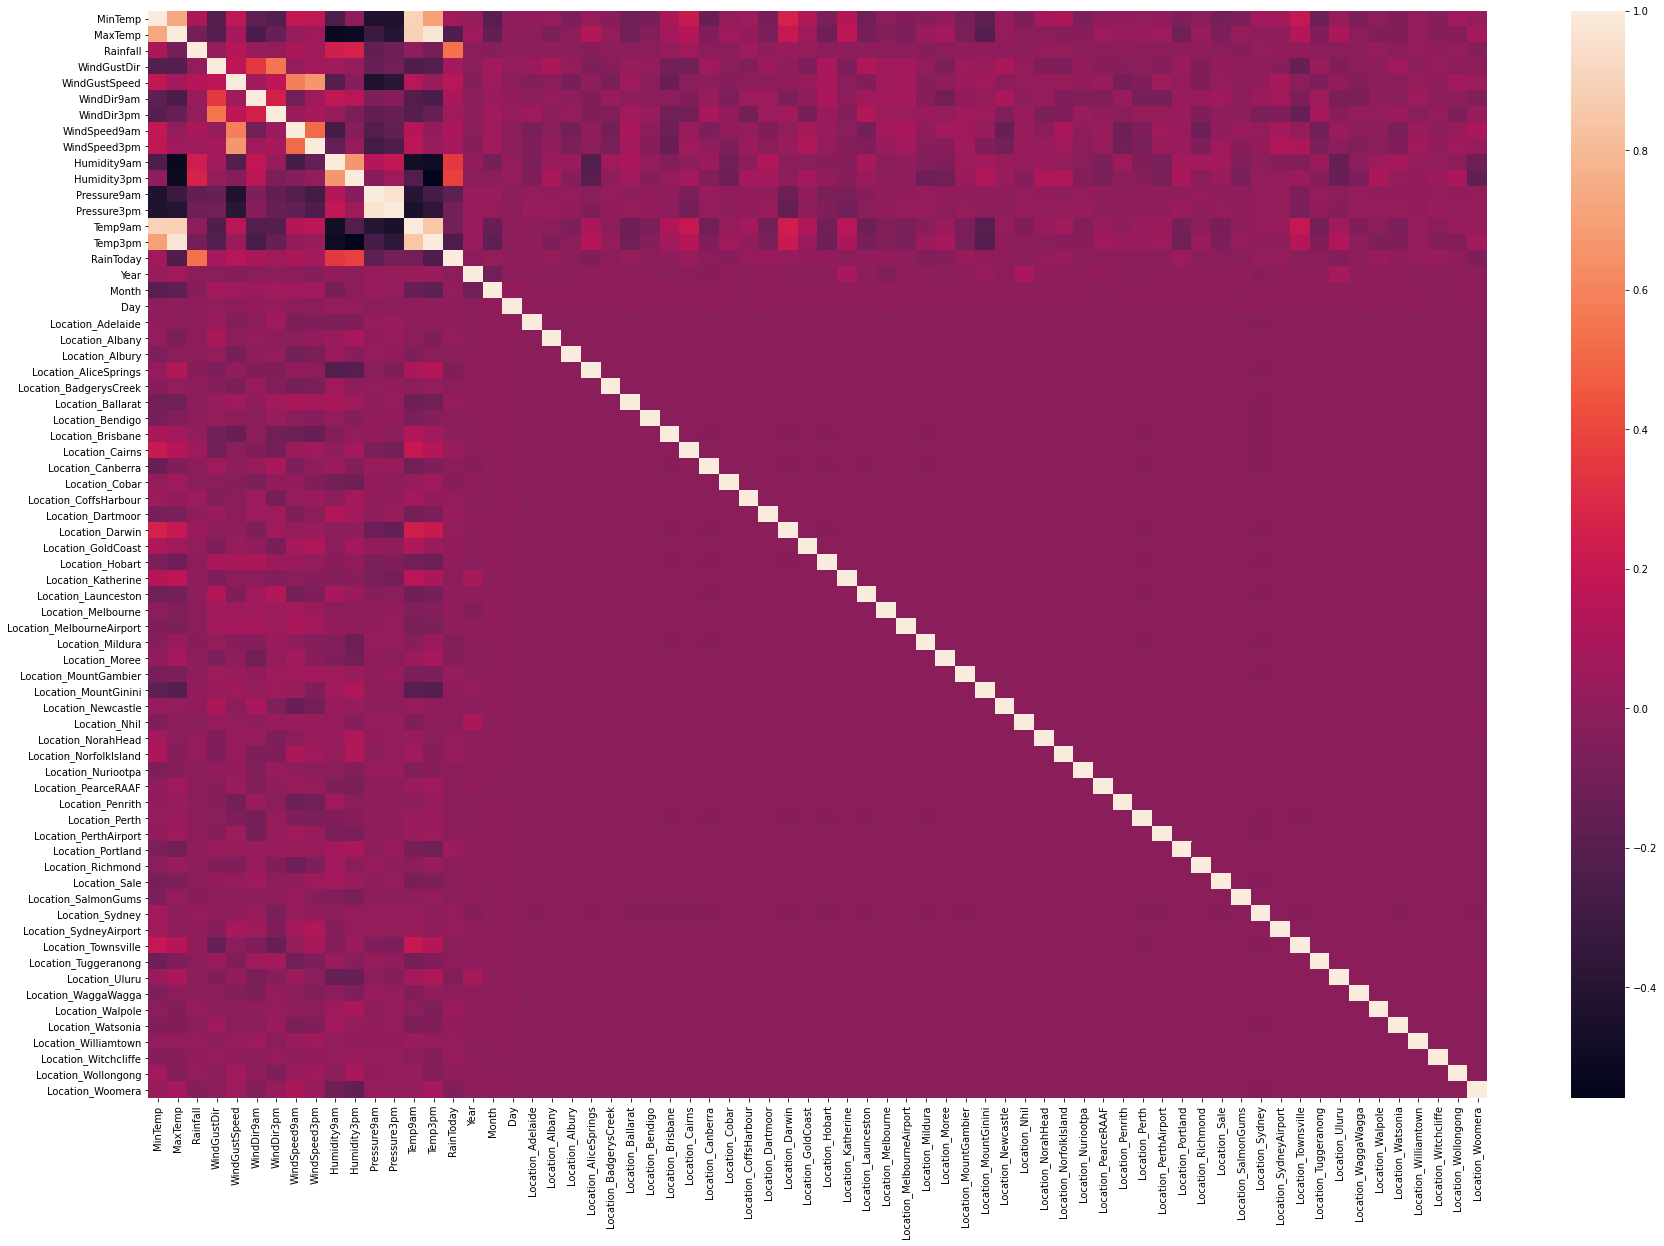

In [53]:
plt.subplots(figsize=(30,20))
sns.heatmap(X_train.corr(method='pearson'))

In [54]:
corr = X_train.corr(method='pearson')

<AxesSubplot:>

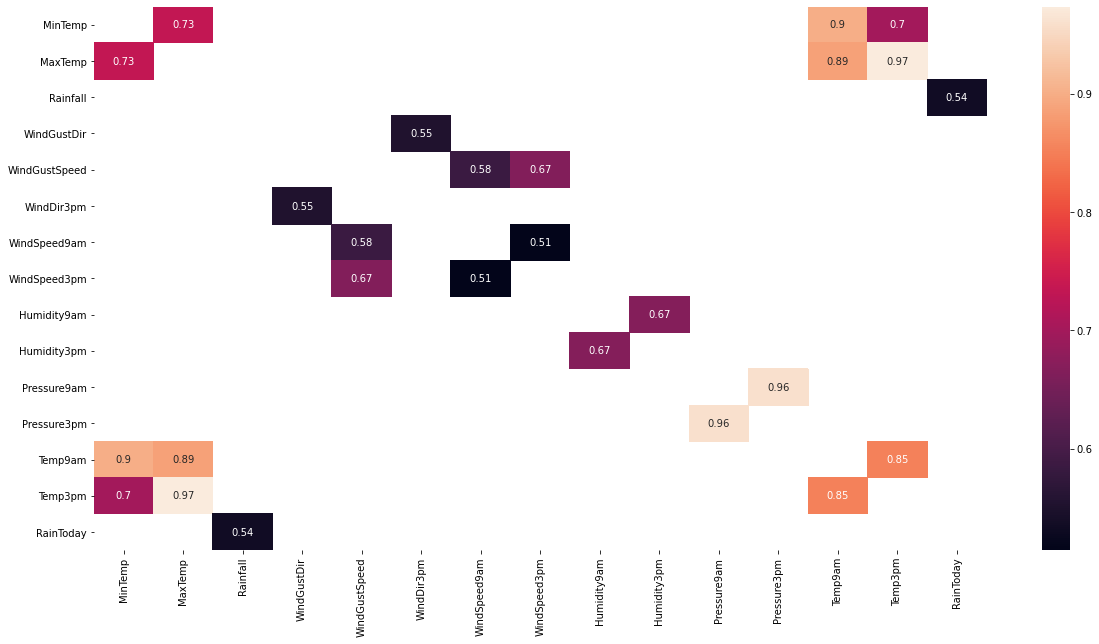

In [55]:
var_num_corr_pos = corr[corr>0.5][corr<1.0].dropna(how='all', axis=0).dropna(how='all', axis=1).columns
plt.subplots(figsize=(20,10))
sns.heatmap(corr[corr>0.5][corr<1.0].dropna(how='all', axis=0).dropna(how='all', axis=1),annot=True)

<AxesSubplot:>

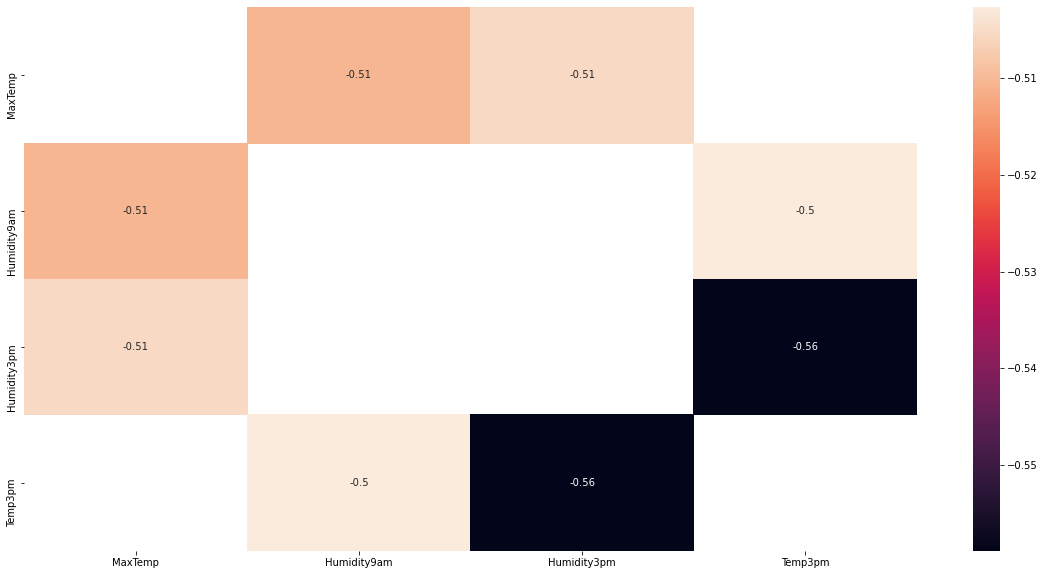

In [56]:
var_num_corr_neg = corr[corr<-0.5][corr>-1.0].dropna(how='all', axis=0).dropna(how='all', axis=1).columns
plt.subplots(figsize=(20,10))
sns.heatmap(corr[corr<-0.5][corr>-1.0].dropna(how='all', axis=0).dropna(how='all', axis=1),annot=True)

Como podemos ver, todas las variables que no son las codificadas tienen una correlación mayor a 0.5 (positiva o negativa).

In [57]:
var_corr_mayor_05 = list(set(var_num_corr_neg.append(var_num_corr_pos)))

##### Información mutua

In [58]:
# Información mutua
mi_dataframe=pd.DataFrame(mutual_info_classif(X_train[var_corr_mayor_05],y_train), index=var_corr_mayor_05)

<AxesSubplot:>

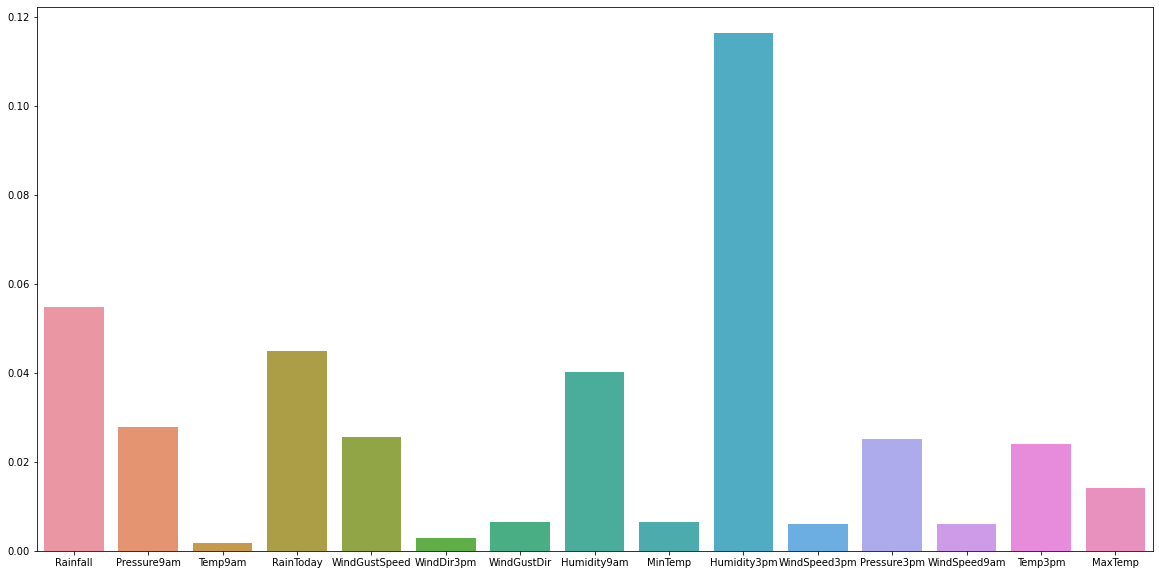

In [59]:
plt.subplots(figsize=(20,10))
sns.barplot(x=mi_dataframe.index, y=mi_dataframe[0].values)

In [60]:
mi_dataframe.sort_values(by=0,ascending=False).head()

0
Humidity3pm  0.116312
Rainfall     0.054717
RainToday    0.044800
Humidity9am  0.040063
Pressure9am  0.027894

##### Test ANOVA

In [61]:
anova_dataframe=pd.DataFrame(f_classif(X_train[var_corr_mayor_05],y_train), columns=var_corr_mayor_05, index=["F-Statistic","p-value"])

In [62]:
anova_dataframe.T.sort_values(by="F-Statistic", ascending=False).head()

F-Statistic  p-value
Humidity3pm  26578.958208      0.0
RainToday    11700.236800      0.0
Humidity9am   7712.653115      0.0
Rainfall      7139.815229      0.0
Pressure9am   6401.148816      0.0

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

Con los gráficos anteriores de información mutua y test ANOVA podemos ver que las 5 variables que más información aportan son: 
- Humidity3pm
- RainToday	
- Humidity9am	
- Pressure9am	
- Rainfall	

La información mutua es una cantidad que mide la dependencia mutua de las dos variables, es decir, mide la reducción de la incertidumbre (entropía) de una variable aleatoria, X, debido al conocimiento del valor de otra variable aleatoria Y. 

Es igual a cero si y sólo si dos variables aleatorias son independientes, y los valores más altos significan una mayor dependencia.

Fuente: Apuntes de la materia, https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html, https://es.wikipedia.org/wiki/Informaci%C3%B3n_mutua

El test de análisis de Varianza ANOVA es una técnica que nos permite comparar las medias de más de 2 conjuntos de datos y poder sacar conclusiones sobre si son iguales o no, pudiendo inferir si las diferencias en medias muestrales son reales o solo debido al muestreo aleatorio.
La hipótesis nula plantea que las medias de cada conjunto de datos son iguales y la alternativa, que no lo son.

El funcionamiento básico de un ANOVA consiste en calcular la media de cada uno de los grupos para a continuación comparar la varianza de estas medias (varianza explicada por la variable grupo, intervarianza) frente a la varianza promedio dentro de los grupos (la no explicada por la variable grupo, intravarianza). Bajo la hipótesis nula de que las observaciones de los distintos grupos proceden todas la misma población (tienen la misma media y varianza), la varianza ponderada entre grupos será la misma que la varianza promedio dentro de los grupos. Conforme las medias de los grupos estén más alejadas las unas de las otras, la varianza entre medias se incrementará y dejará de ser igual a la varianza promedio dentro de los grupos.

El estadístico estudiado en el ANOVA, conocido como F ratio, es el ratio entre la varianza de las medias de los grupos y el promedio de la varianza dentro de los grupos. Este estadístico sigue una distribución conocida como “F de Fisher-Snedecor”. Si se cumple la hipótesis nula, el estadístico F adquiere el valor de 1 ya que la intervarianza será igual a la intravarianza. Cuanto más difieran las medias de los grupos mayor será la varianza entre medias en comparación al promedio de la varianza dentro de los grupos, obteniéndose valores de F superiores a 1 y por lo tanto menor la probabilidad de que la distribución adquiera valores tan extremos (menor el p-value).

Fuente: Apuntes de la materia y https://www.cienciadedatos.net/documentos/19_anova

De las variables que estaban más correlacionadas, podríamos eliminar:
- Temp9am
- MaxTemp
- Pressure3pm

In [63]:
#Benchmark
#Estandarizar datos
scale=StandardScaler()
scale.fit(X_train)
X_train_completo = scale.transform(X_train)
X_test_completo = scale.transform(X_test)

# Entrenar con todos los datos
model = LogisticRegression()
model = model.fit(X_train_completo,y_train)

# Predecir en test set
yhat = model.predict(X_test_completo)
report = classification_report(y_test, yhat)

print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21638
           1       0.74      0.50      0.60      6152

    accuracy                           0.85     27790
   macro avg       0.80      0.72      0.75     27790
weighted avg       0.84      0.85      0.84     27790



In [64]:
#Sin columnas Temp9am, MaxTemp, Pressure3pm
#Estandarizar datos
scale=StandardScaler()
scale.fit(X_train.drop(columns=["Temp9am","MaxTemp","Pressure3pm"]))
X_train_sin_columnas_corr = scale.transform(X_train.drop(columns=["Temp9am","MaxTemp","Pressure3pm"]))
X_test_sin_columnas_corr = scale.transform(X_test.drop(columns=["Temp9am","MaxTemp","Pressure3pm"]))

# Entrenar con los datos sin outliers
model = LogisticRegression()
model = model.fit(X_train_sin_columnas_corr,y_train)

# Predecir en test set
yhat = model.predict(X_test_sin_columnas_corr)
report = classification_report(y_test, yhat)

print(report )

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21638
           1       0.73      0.49      0.59      6152

    accuracy                           0.85     27790
   macro avg       0.80      0.72      0.75     27790
weighted avg       0.84      0.85      0.84     27790



Podemos ver que eliminando las columnas más correlacionadas y de menor información mutua, no generamos ninguna mejora en cuanto a las métricas de nuestro modelo. Por lo tanto, decidimos mantenerlas.

In [65]:
X_train_estandarizado = pd.DataFrame(X_train_completo, columns=X_train.columns, index=X_train.index)
X_test_estandarizado = pd.DataFrame(X_test_completo, columns=X_test.columns, index=X_test.index)

In [66]:
X_train_estandarizado.to_csv("X_train_estandarizado.csv")
X_test_estandarizado.to_csv("X_test_estandarizado.csv")

#### Balanceo de muestras Yes-No en RainTomorrow

In [67]:
from sklearn.utils import resample

# concatenate our training data back together
train_data = pd.concat([X_train_estandarizado, y_train], axis=1)

# separate minority and majority classes
rain_no = train_data[train_data.RainTomorrow==0]
rain_yes = train_data[train_data.RainTomorrow==1]

# upsample minority
rain_yes_upsampled = resample(rain_yes,
                          replace=True, # sample with replacement
                          n_samples=len(rain_no), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([rain_no, rain_yes_upsampled])

# check new class counts
upsampled.RainTomorrow.value_counts()

X_train_duplicados = upsampled.drop(columns="RainTomorrow")
y_train_duplicados = upsampled.RainTomorrow

In [68]:
upsampled.RainTomorrow.value_counts()

0    86037
1    86037
Name: RainTomorrow, dtype: int64

In [69]:
# LogisticRegression
# Entrenar con todos los datos
model = LogisticRegression()
model = model.fit(X_train_duplicados,y_train_duplicados)

# Predecir en test set
yhat = model.predict(X_test_estandarizado)
report = classification_report(y_test, yhat)

print(report)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86     21638
           1       0.52      0.77      0.62      6152

    accuracy                           0.79     27790
   macro avg       0.72      0.78      0.74     27790
weighted avg       0.84      0.79      0.80     27790



In [70]:
# RandomForestClassifier
# Entrenar con todos los datos
model = RandomForestClassifier()
model = model.fit(X_train_duplicados,y_train_duplicados)

# Predecir en test set
yhat = model.predict(X_test_estandarizado)
report = classification_report(y_test, yhat)

print(report)

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     21638
           1       0.73      0.58      0.65      6152

    accuracy                           0.86     27790
   macro avg       0.81      0.76      0.78     27790
weighted avg       0.85      0.86      0.85     27790



Podemos notar que al clonar muestras con RainTomorrow=1, la Accuracy general de la regresión logística disminuyó, la precision en la clase 'Yes' también disminuyó, pero el recall de esta clase aumentó. 

En Random Forest también vemos un pequeño aumento del recall a costa de la precisión para la clase 1 y la accuracy se mantiene constante.

Con estas evidencias, no considero que sea beneficioso aumentar las muestras de esta clase (por lo menos con la técnica utilizada) y continuaré utilizando los conjuntos de train y test anteriormente definidos.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

In [83]:
# LogisticRegression
# Entrenar con todos los datos
model = LogisticRegression()
model = model.fit(X_train_estandarizado,y_train)

# Predecir en test set
yhat = model.predict(X_test_estandarizado)
report = classification_report(y_test, yhat)
lrfpr, lrtpr, lrthresh = roc_curve(y_test, model.predict_proba(X_test_estandarizado)[:,1], pos_label=1)
auc = roc_auc_score(y_test, model.predict_proba(X_test_estandarizado)[:,1])
print(auc)
print(report)

0.8654171801498857
              precision    recall  f1-score   support

           0       0.87      0.95      0.91     21638
           1       0.74      0.50      0.60      6152

    accuracy                           0.85     27790
   macro avg       0.80      0.72      0.75     27790
weighted avg       0.84      0.85      0.84     27790



In [84]:
# DecisionTreeClassifier
# Entrenar con todos los datos
model = DecisionTreeClassifier()
model = model.fit(X_train_estandarizado,y_train)

# Predecir en test set
yhat = model.predict(X_test_estandarizado)
report = classification_report(y_test, yhat)
treefpr, treetpr, treethresh = roc_curve(y_test, model.predict_proba(X_test_estandarizado)[:,1], pos_label=1)
auc = roc_auc_score(y_test, model.predict_proba(X_test_estandarizado)[:,1])
print(auc)
print(report)

0.7001076632029262
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     21638
           1       0.52      0.54      0.53      6152

    accuracy                           0.79     27790
   macro avg       0.70      0.70      0.70     27790
weighted avg       0.79      0.79      0.79     27790



In [85]:
# RandomForestClassifier
# Entrenar con todos los datos
model = RandomForestClassifier()
model = model.fit(X_train_estandarizado,y_train)

# Predecir en test set
yhat = model.predict(X_test_estandarizado)
report = classification_report(y_test, yhat)
rffpr, rftpr, rfthresh = roc_curve(y_test, model.predict_proba(X_test_estandarizado)[:,1], pos_label=1)
auc = roc_auc_score(y_test, model.predict_proba(X_test_estandarizado)[:,1])
print(auc)
print(report)

0.8890041116919604
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21638
           1       0.78      0.50      0.61      6152

    accuracy                           0.86     27790
   macro avg       0.82      0.73      0.76     27790
weighted avg       0.85      0.86      0.85     27790



In [86]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Como el modelo de Random Forest fue el que mejor resultados arrojó, procederemos a optimizar sus hiperparámetros mediante RandomizedSearchCV

In [75]:
parameters = {
    'max_depth'         : [50, 100, None],
    'max_leaf_nodes'    : [100,150,200, None],
    'random_state'      : [42],
}

In [76]:
clf = RandomizedSearchCV(RandomForestClassifier(), parameters, cv=5, n_jobs=-1, scoring='accuracy')
clf.fit(X_train_estandarizado, y_train)

print(clf.score(X_train_estandarizado, y_train))
print(clf.score(X_test_estandarizado, y_test))
print(clf.best_params_)

0.9999909223772478
0.8599856063332134
{'random_state': 42, 'max_leaf_nodes': None, 'max_depth': 50}


Lamentablemente no conseguimos optimizar los hiperparámetros del modelo para conseguir una mejor performance del mismo. Por cuestiones de tiempo no seguiremos intentando optimizarlos.

In [87]:
# Entrenamos el modelo con los parámetros definidos
rfc = RandomForestClassifier(max_depth=50,random_state=42)
rfc.fit(X_train_estandarizado, y_train)
y_pred_train = rfc.predict(X_train_estandarizado)
y_pred_test = rfc.predict(X_test_estandarizado)
report = classification_report(y_test, y_pred_test)
rfcfpr, rfctpr, rfcthresh = roc_curve(y_test, rfc.predict_proba(X_test_estandarizado)[:,1], pos_label=1)
auc = roc_auc_score(y_test, model.predict_proba(X_test_estandarizado)[:,1])
print(auc)
print(report)

0.8890041116919604
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     21638
           1       0.79      0.50      0.61      6152

    accuracy                           0.86     27790
   macro avg       0.83      0.73      0.76     27790
weighted avg       0.85      0.86      0.85     27790



In [88]:
feature_importances = pd.DataFrame(rfc.feature_importances_,index=X_train.columns, columns=["feature_importances"]).sort_values(by="feature_importances", ascending=False)

In [89]:
feature_importances

feature_importances
Humidity3pm                     0.173687
Pressure3pm                     0.061223
Humidity9am                     0.059050
Pressure9am                     0.057681
Temp3pm                         0.052825
...                                  ...
Location_Newcastle              0.000873
Location_Townsville             0.000826
Location_Darwin                 0.000819
Location_Katherine              0.000558
Location_Uluru                  0.000451

[68 rows x 1 columns]

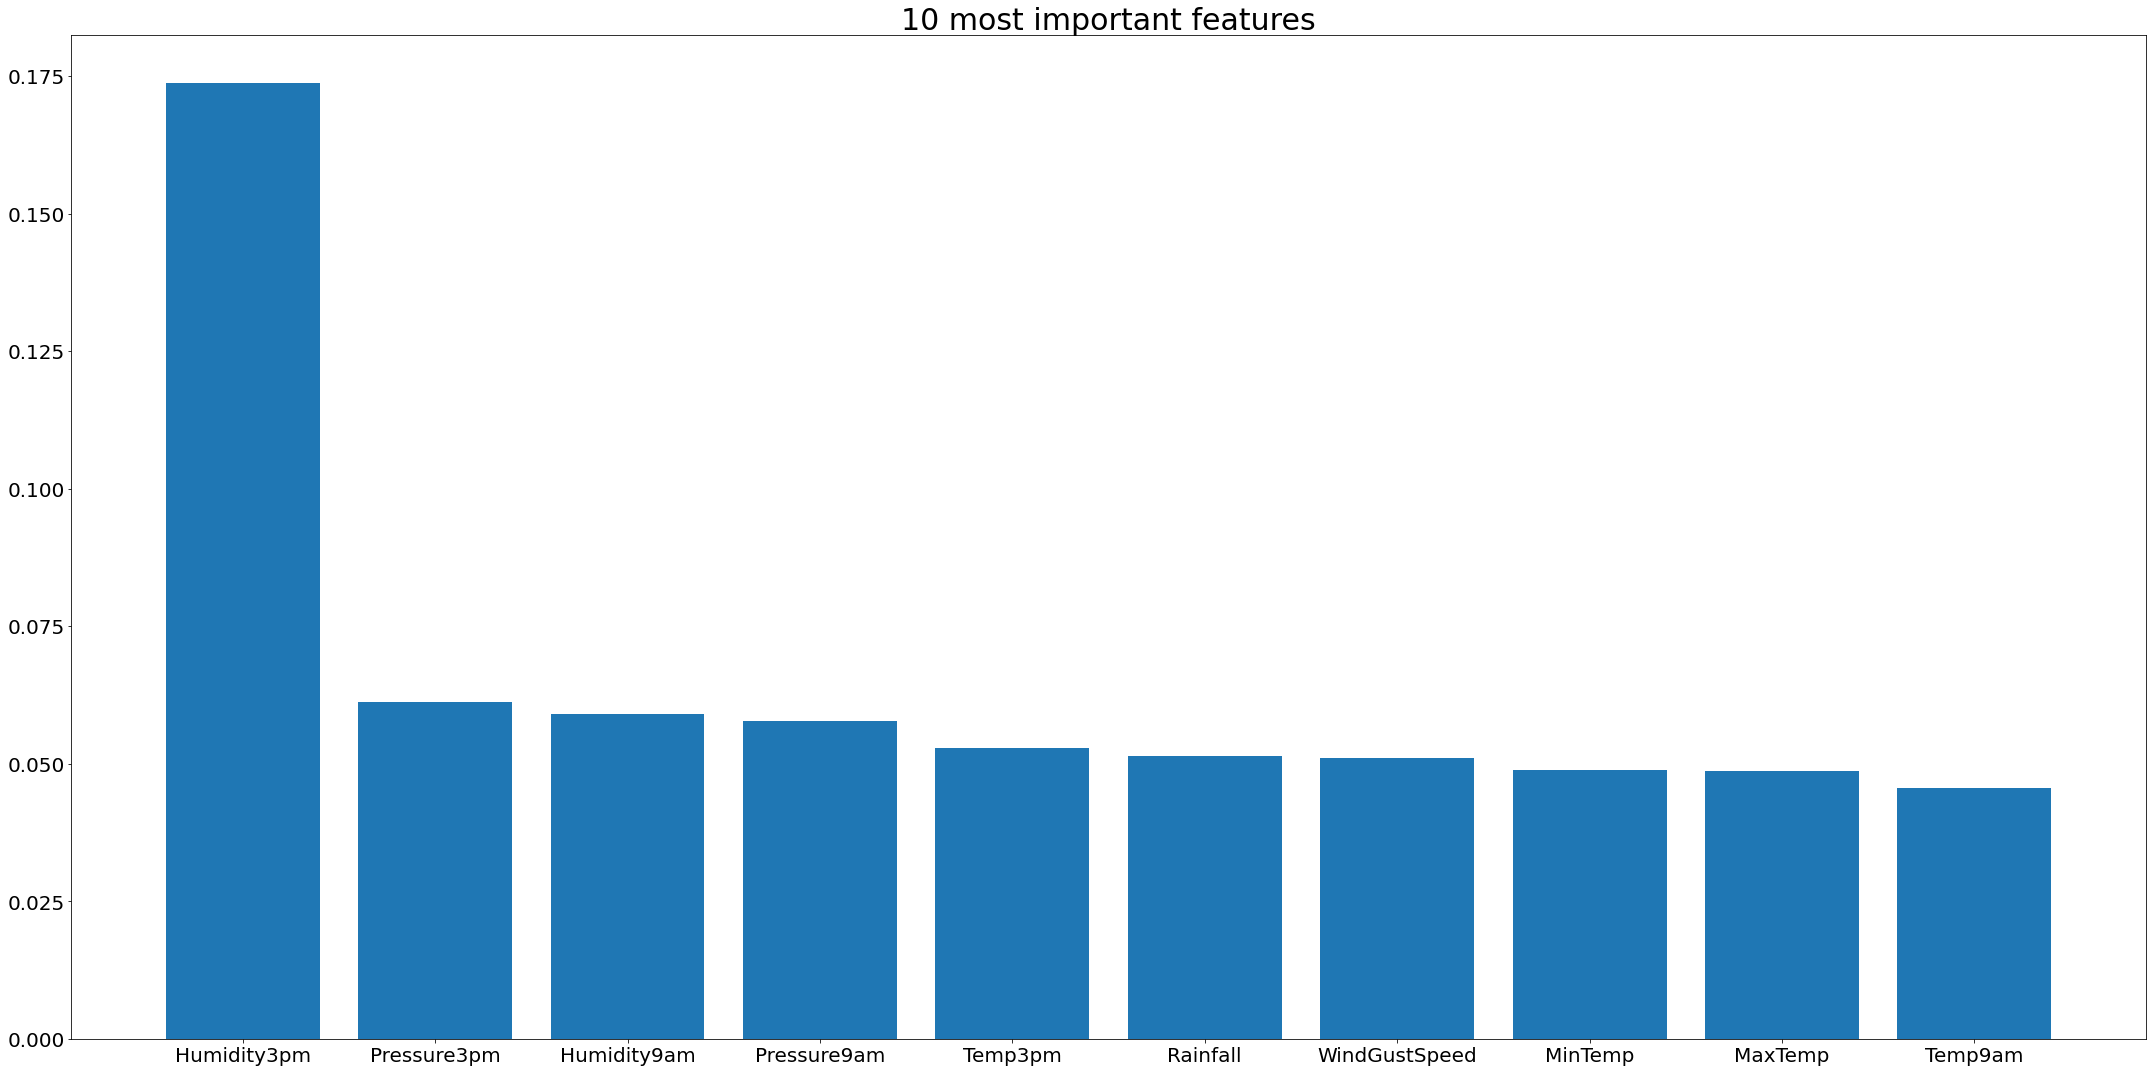

In [95]:
plt.subplots(figsize=(30,15))
plt.title("10 most important features", fontsize=30)
plt.bar(x=feature_importances.index[:10],height=feature_importances["feature_importances"][:10])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.savefig("10_most_important_features.jpg")
plt.show()

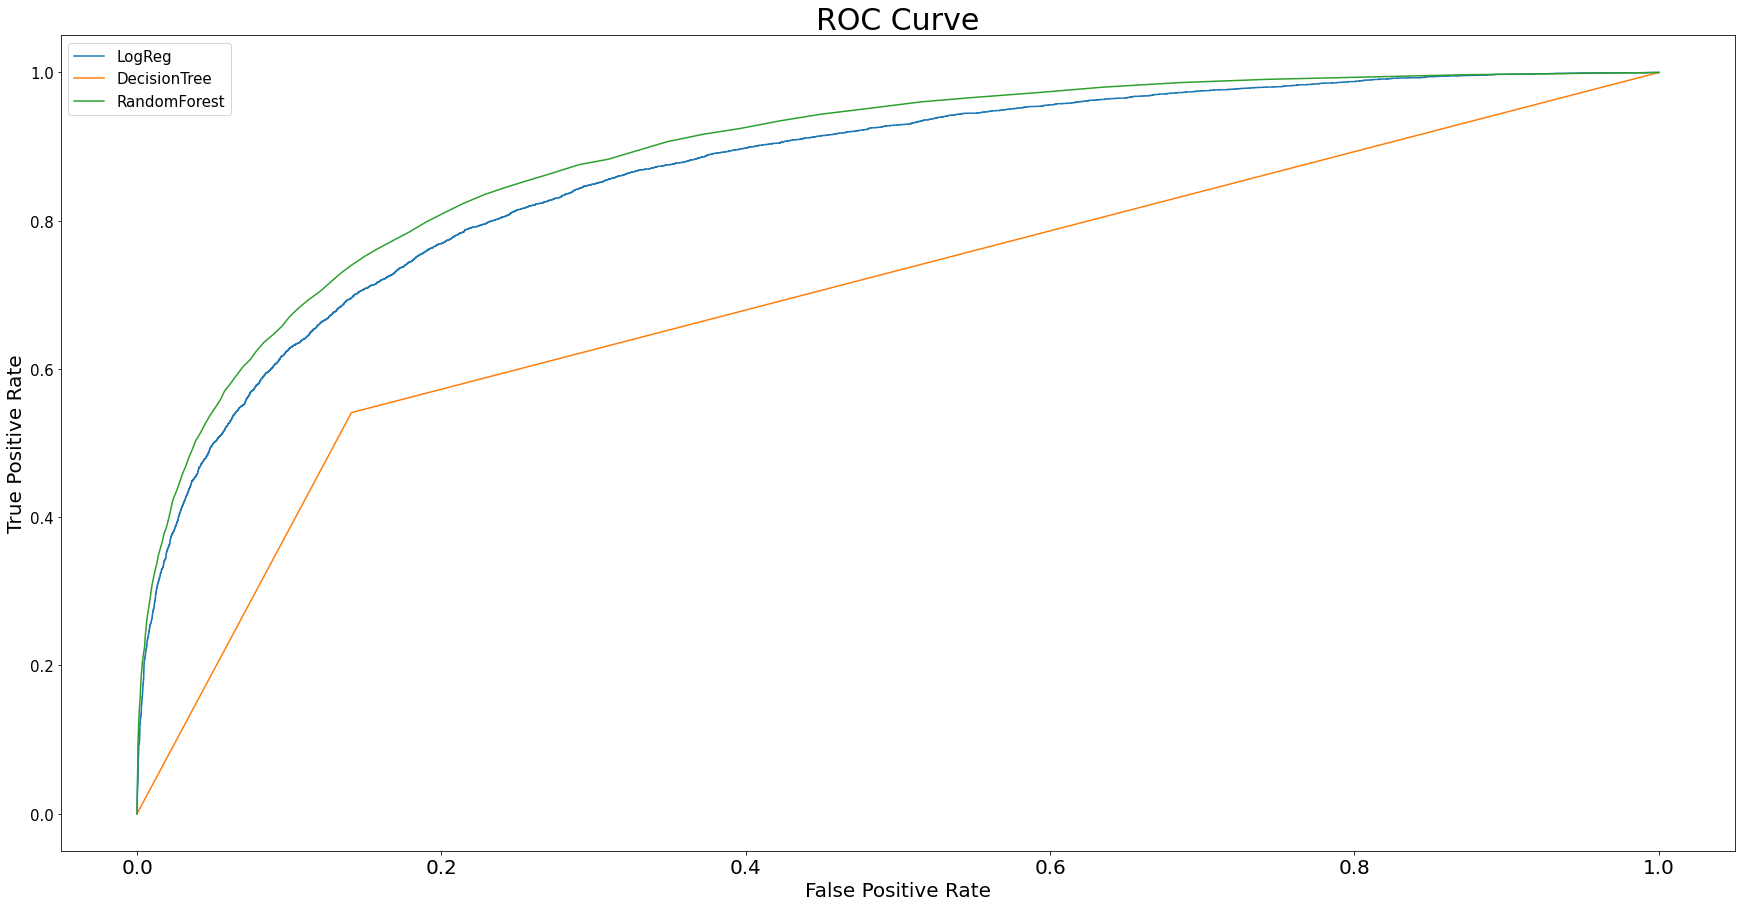

In [98]:
plt.subplots(figsize=(30,15))
plt.plot(lrfpr, lrtpr, label="LogReg")
plt.plot(treefpr, treetpr, label="DecisionTree")
plt.plot(rfcfpr, rfctpr, label="RandomForest")
plt.title("ROC Curve", fontsize=30)
plt.xlabel("False Positive Rate", fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("True Positive Rate", fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig("ROC_Curve.jpg")
plt.show()

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

A partir del modelo de Random Forest entrenado podemos ver que la variable que más peso tiene para predecir si va a llover el día siguiente es la humedad a las 3 de la tarde. Luego, si bien hay variables que tienen cierta importancia, ninguna tanto como la mencionada.

Esta particular influencia de la variable Humidity3pm la habíamos notado también al realizar el test ANOVA y al calcular la información mutua de las variables.

Es interesante destacar que las variables asociadas a cada una de las distintas ciudades son las variables menos relevantes para el modelo y también las que menos información aportaban según ANOVA e Información Mutua. Creo que el hecho de haber realizado un OHE de estas variables puede no haber sido la técnica óptima para codificarlas y que otro método de codificación podría evaluarse para ver si la variable ubicación adquiere mayor relevancia y/o si el modelo performa mejor.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.